https://github.com/ageron/handson-ml2/blob/master/03_classification.ipynb

### Setup

In [12]:
import os

# PROJECT_ROOT_DIR = 'hands_on_ml/'
CHAPTER_ID = 'classification'
IMAGE_PATH = os.path.join('images', CHAPTER_ID)
os.makedirs(IMAGE_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension='png', resolution=300):
    path = os.path.join(IMAGE_PATH, fig_id + '.' + fig_extension)
    print('Saving figure', fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# MNIST

In [17]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

ÏÇ¨Ïù¥ÌÇ∑Îü∞ÏóêÏÑú ÏùΩÏñ¥ Îì§Ïù∏ Îç∞Ïù¥ÌÑ∞ÏÖãÎì§ÏùÄ ÏùºÎ∞òÏ†ÅÏúºÎ°ú ÎπÑÏä∑Ìïú dictÍµ¨Ï°∞Î•º Í∞ñÎäîÎã§.
- Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ ÏÑ§Î™ÖÌïòÎäî DESCR
- ÏÉòÌîåÏù¥ ÌïòÎÇòÏùò Ìñâ, ÌäπÏÑ±Ïù¥ ÌïòÎÇòÏùò Ïó¥Î°ú Íµ¨ÏÑ±Îêú Î∞∞Ïó¥ÏùÑ Í∞ÄÏßÑ data
- Î†àÏù¥Î∏î Î∞∞Ïó¥ÏùÑ Îã¥ÏùÄ target

In [18]:
X, y = mnist['data'], mnist['target']
X.shape

(70000, 784)

In [19]:
y.shape

(70000,)

70000Í∞úÏùò Ïù¥ÎØ∏ÏßÄÍ∞Ä ÏûàÍ≥† Í∞Å Ïù¥ÎØ∏ÏßÄÏóî 784Í∞úÏùò ÌäπÏÑ±Ïù¥ ÏûàÎã§. Ïù¥ÎØ∏ÏßÄÍ∞Ä 28x28 ÌîΩÏÖÄÏù¥Í∏∞ ÎïåÎ¨∏Ïù¥Îã§. \
Í∞úÍ∞úÏùò ÌäπÏÑ±ÏùÄ Îã®ÏàúÌûà 0(Ìù∞ÏÉâ) ~ 255(Í≤ÄÏùÄÏÉâ)ÍπåÏßÄÏùò ÌîΩÏÖÄÍ∞ïÎèÑÎ•º ÎÇòÌÉÄÎÇ∏Îã§. \
Îç∞Ïù¥ÌÑ∞ÏÖãÏóêÏÑú Ïù¥ÎØ∏ÏßÄ ÌïòÎÇòÎ•º ÌôïÏù∏Ìï¥Î≥∏Îã§. ÏÉòÌîåÏùò ÌäπÏÑ± Î≤°ÌÑ∞Î•º Ï∂îÏ∂úÌï¥ 28x28 Î∞∞Ïó¥Î°ú ÌÅ¨Í∏∞Î•º Î∞îÍæ∏Í≥† matplotlibÏùò imshow() Ìï®ÏàòÎ•º ÏÇ¨Ïö©Ìï¥ Í∑∏Î¶∞Îã§.

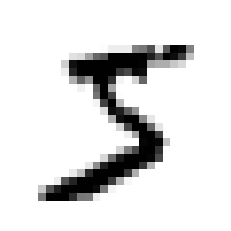

In [20]:
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap="binary")
plt.axis('off')
plt.show()

In [ ]:
y[0]

Ïã§Ï†ú Î†àÏù¥Î∏îÏùÑ ÌôïÏù∏ÌñàÏùÑ Îïå ÏúÑ Í∑∏Î¶ºÍ≥º Ïà´ÏûêÍ∞Ä ÏùºÏπòÌïúÎã§. 


Î†àÏù¥Î∏îÏùÄ Î¨∏ÏûêÏó¥Ïù¥Îã§. ÎåÄÎ∂ÄÎ∂Ñ Î®∏Ïã†Îü¨Îãù ÏïåÍ≥†Î¶¨Ï¶òÏùÄ Ïà´ÏûêÎ•º Í∏∞ÎåÄÌïòÎØÄÎ°ú yÎ•º Ï†ïÏàòÎ°ú Î≥ÄÌôòÌïúÎã§.

In [21]:
import numpy as np

y = y.astype(np.uint8)

In [22]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap=mpl.cm.binary, interpolation='nearest')
    plt.axis

In [23]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)

Saving figure more_digits_plot


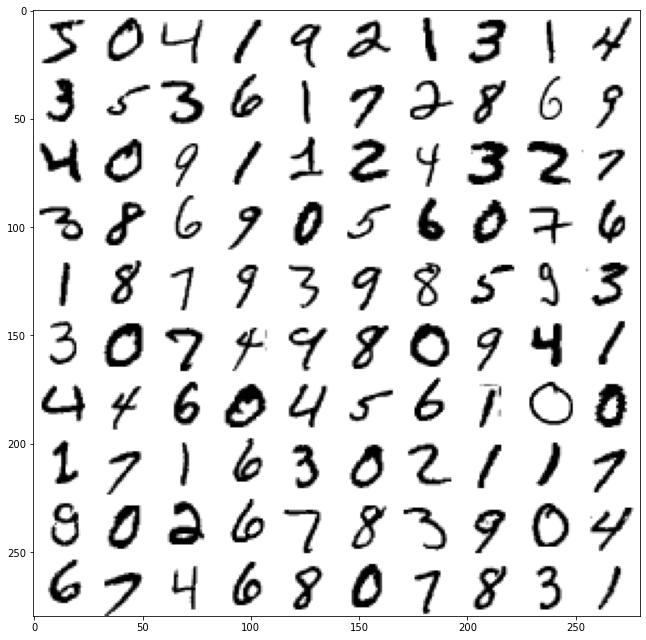

In [24]:
plt.figure(figsize=(9,9))
example_images = X[:100]
plot_digits(example_images, images_per_row=10)
save_fig('more_digits_plot')
plt.show()

Îç∞Ïù¥ÌÑ∞Î•º Îì§Ïó¨Îã§Î≥¥Í∏∞ Ï†ÑÏóê test_setÏùÑ ÎßåÎì†Îã§. MNIST datasetÏùÄ ÏïûÏ™Ω 60000Í∞úÏôÄ Îí§Ï™Ω 10000Í∞úÎ°ú ÌõàÎ†®, ÌÖåÏä§Ìä∏ÏÑ∏Ìä∏Î•º ÎÇòÎà† ÎëîÎã§.

In [25]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

ÌõàÎ†® ÏÑ∏Ìä∏Îäî Ïù¥ÎØ∏ ÏÑûÏó¨ ÏûàÏñ¥, Î™®Îì† ÍµêÏ∞® Í≤ÄÏ¶ù Ìè¥ÎìúÎ•º ÎπÑÏä∑ÌïòÍ≤å ÎßåÎì†Îã§, Í≤åÎã§Í∞Ä Ïñ¥Îñ§ ÌïôÏäµ ÏïåÍ≥†Î¶¨Ï¶òÏùÄ ÌõàÎ†® ÏÉòÌîåÏùò ÏàúÏÑúÏóê ÎØºÍ∞êÌï¥ÏÑú ÎßéÏùÄ ÎπÑÏä∑Ìïú ÏÉòÌîåÏù¥ Ïó∞Ïù¥Ïñ¥ ÎÇòÌÉÄÎÇòÎ©¥ ÏÑ±Îä•Ïù¥ ÎÇòÎπ†ÏßÑÎã§. Ïù¥Îäî Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ ÏÑûÏùåÏúºÎ°ú Î∞©ÏßÄÌï† Ïàò ÏûàÎã§.

## 1.Ïù¥ÏßÑ Î∂ÑÎ•òÍ∏∞ ÌõàÎ†®
Î¨∏Ï†úÎ•º Îã®ÏàúÌôîÌï¥ÏÑú ÌïòÎÇòÏùò Ïà´Ïûê(Ïòà:5)Îßå ÏãùÎ≥ÑÌï¥Î≥¥Ïûê. Ïù¥ '5-Í∞êÏßÄÍ∏∞'Îäî '5'ÏôÄ '5Í∞Ä ÏïÑÎãò' ÎëêÍ∞úÏùò ÌÅ¥ÎûòÏä§Î•º Íµ¨Î∂ÑÌï† Ïàò ÏûàÎäî **Ïù¥ÏßÑ Î∂ÑÎ•òÍ∏∞(binary classifier)**Ïùò Ìïú ÏòàÏù¥Îã§. Î∂ÑÎ•ò ÏûëÏóÖÏùÑ ÏúÑÌï¥ ÌÉÄÍπÉ Î≤°ÌÑ∞Î•º ÎßåÎì§Ïñ¥Î≥∏Îã§.

In [26]:
y_train_5 = (y_train==5) # 5=True, else=False
y_test_5 = (y_test==5)

Ïù¥Ï†ú Î∂ÑÎ•ò Î™®Îç∏ÏùÑ ÌïòÎÇò ÏÑ†ÌÉùÌï¥ÏÑú ÌõàÎ†®ÏãúÌÇ®Îã§. sklearnÏùò SGDClassifier ÌÅ¥ÎûòÏä§Î•º ÏÇ¨Ïö©ÌïúÎã§. **ÌôïÎ•†Ï†Å Í≤ΩÏÇ¨ ÌïòÍ∞ïÎ≤ï(Stochastic Gradient Descent)**Î∂ÑÎ•òÍ∏∞Îäî Ìïú Î≤àÏóê ÌïòÎÇòÏî© ÌõàÎ†® ÏÉòÌîåÏùÑ ÎèÖÎ¶ΩÏ†ÅÏúºÎ°ú Ï≤òÎ¶¨ÌïòÍ∏∞ ÎïåÎ¨∏Ïóê Îß§Ïö∞ ÌÅ∞ Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ Ìö®Ïú®Ï†ÅÏúºÎ°ú Ï≤òÎ¶¨ÌïòÎäî Ïû•Ï†êÏùÑ ÏßÄÎãàÍ≥† ÏûàÎã§. 

SGDClassifier Î™®Îç∏ÏùÑ ÎßåÎì§Í≥† Ï†ÑÏ≤¥ ÌõàÎ†® ÏÑ∏Ìä∏Î•º ÏÇ¨Ïö©Ìï¥ ÌõàÎ†®ÏãúÌÇ®Îã§.

In [14]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

üí° SGDClassifierÎäî ÌõàÎ†®ÌïòÎäî Îç∞ Î¨¥ÏûëÏúÑÏÑ±ÏùÑ ÏÇ¨Ïö©ÌïúÎã§. Í≤∞Í≥ºÎ•º Ïû¨ÌòÑÌïòÍ≥† Ïã∂Îã§Î©¥ random_stateÎ•º ÏßÄÏ†ïÌï¥Ïïº ÌïúÎã§. üí°

Ïù¥Ï†ú Ïù¥ Î™®Îç∏ÏùÑ ÏÇ¨Ïö©Ìï¥ Ïà´Ïûê 5Ïùò Ïù¥ÎØ∏ÏßÄÎ•º Í∞êÏßÄÌï¥Î≥∏Îã§.

In [15]:
sgd_clf.predict([some_digit])

array([ True])

Î∂ÑÎ•òÍ∏∞Îäî Ïù¥ Ïù¥ÎØ∏ÏßÄÍ∞Ä 5Î•º ÎÇòÌÉÄÎÇ∏Îã§Í≥† Ï∂îÏ∏°ÌñàÍ≥†, Ï†ïÌôïÌûà ÎßûÏ∑ÑÎã§.

## 2.ÏÑ±Îä• Ï∏°Ï†ï

### 2-1.ÍµêÏ∞® Í≤ÄÏ¶ùÏùÑ ÏÇ¨Ïö©Ìïú Ï†ïÌôïÎèÑ Ï∏°Ï†ï

#### 2-1-1.ÍµêÏ∞® Í≤ÄÏ¶ù Íµ¨ÌòÑ
ÏÇ¨Ïù¥ÌÇ∑Îü∞Ïù¥ Ï†úÍ≥µÌïòÎäî Í∏∞Îä•Î≥¥Îã§ ÍµêÏ∞® Í≤ÄÏ¶ùÏùÑ Îçî ÎßéÏù¥ Ï†úÏñ¥Ìï¥Ïïº Ìï† ÌïÑÏöîÍ∞Ä ÏûàÏúºÎØÄÎ°ú ÍµêÏ∞® Í≤ÄÏ¶ù Í∏∞Îä•ÏùÑ ÏßÅÏ†ë Íµ¨ÌòÑÌï¥Ïïº ÌïúÎã§. Îã§Ïùå ÏΩîÎìúÎäî ÏÇ¨Ïù¥ÌÇ∑Îü∞Ïùò cross_val_score() Ìï®ÏàòÏôÄ Í±∞Ïùò Í∞ôÏùÄ ÏûëÏóÖÏùÑ ÏàòÌñâÌïòÍ≥† ÎèôÏùºÌïú Í≤∞Í≥ºÎ•º Ï∂úÎ†•ÌïúÎã§.

In [16]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42, shuffle=True)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]
    
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred)) 

0.9669
0.91625
0.96785


StratifiedKFoldÎäî ÌÅ¥ÎûòÏä§Î≥Ñ ÎπÑÏú®Ïù¥ Ïú†ÏßÄÎêòÎèÑÎ°ù Ìè¥ÎìúÎ•º ÎßåÎì§Í∏∞ ÏúÑÌï¥ Í≥ÑÏ∏µÏ†Å ÏÉòÌîåÎßÅÏùÑ ÏàòÌñâÌïúÎã§. Îß§ Î∞òÎ≥µÏóêÏÑú Î∂ÑÎ•òÍ∏∞ Í∞ùÏ≤¥Î•º Î≥µÏ†úÌïòÏó¨ ÌõàÎ†® Ìè¥ÎìúÎ°ú ÌõàÎ†®ÏãúÌÇ§Í≥† ÌÖåÏä§Ìä∏ Ìè¥ÎìúÎ°ú ÏòàÏ∏°ÏùÑ ÎßåÎì†Îã§. Í∑∏Îü∞ Îã§Ïùå Ïò¨Î∞îÎ•∏ ÏòàÏ∏°Ïùò ÏàòÎ•º ÏÑ∏Ïñ¥ Ï†ïÌôïÌïú ÏòàÏ∏°Ïùò ÎπÑÏú®ÏùÑ Ï∂úÎ†•ÌïúÎã§.

cross_val_score() Ìï®ÏàòÎ°ú Ìè¥ÎìúÍ∞Ä 3Í∞úÏù∏ k-Í≤π ÍµêÏ∞® Í≤ÄÏ¶ùÏùÑ ÏÇ¨Ïö©Ìï¥ SGDClassifier Î™®Îç∏ÏùÑ ÌèâÍ∞ÄÌï¥Î≥∏Îã§. k-Í≤π ÍµêÏ∞® Í≤ÄÏ¶ùÏùÄ ÌõàÎ†® ÏÑ∏Ìä∏Î•º k(Ïó¨Í∏∞ÏÑ† 3Í∞ú)Í∞úÏùò Ìè¥ÎìúÎ°ú ÎÇòÎàÑÍ≥†, Í∞Å Ìè¥ÎìúÏóê ÎåÄÌï¥ ÏòàÏ∏°ÏùÑ ÎßåÎì§Í≥† ÌèâÍ∞ÄÌïòÍ∏∞ ÏúÑÌï¥ ÎÇòÎ®∏ÏßÄ Ìè¥ÎìúÎ°ú ÌõàÎ†®ÏãúÌÇ® Î™®Îç∏ÏùÑ ÏÇ¨Ïö©ÌïúÎã§.

In [17]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.95035, 0.96035, 0.9604 ])

Î™®Îì† ÍµêÏ∞® Í≤ÄÏ¶ù Ìè¥ÎìúÏóê ÎåÄÌï¥ Ï†ïÌôïÎèÑÍ∞Ä 95% Ïù¥ÏÉÅÏù¥Îã§. 

Î™®Îì† Ïù¥ÎØ∏ÏßÄÎ•º '5 ÏïÑÎãò' ÌÅ¥ÎûòÏä§Î°ú Î∂ÑÎ•òÌïòÎäî ÎçîÎØ∏ Î∂ÑÎ•òÍ∏∞Î•º ÎßåÎì§Ïñ¥ ÎπÑÍµêÌï¥Î≥∏Îã§.

In [18]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        return self
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

Î™®Îç∏Ïùò Ï†ïÌôïÎèÑÎ•º ÌôïÏù∏

In [19]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.91125, 0.90855, 0.90915])

Ï†ïÌôïÎèÑÍ∞Ä 90%Ïù¥ÏÉÅÏúºÎ°ú ÎÇòÏôîÎã§. Ïù¥ÎØ∏ÏßÄÏùò 10% Ï†ïÎèÑÎßå Ïà´Ïûê 5Ïù¥Í∏∞ ÎïåÎ¨∏Ïóê Î¨¥Ï°∞Í±¥ '5ÏïÑÎãò'ÏúºÎ°ú ÏòàÏ∏°ÌïòÎ©¥ 90%Ïù¥Îã§. 

ÏúÑÏùò ÏãúÎèÑÎäî Ï†ïÌôïÎèÑÎ•º Î∂ÑÎ•òÍ∏∞Ïùò ÏÑ±Îä• Ï∏°Ï†ï ÏßÄÌëúÎ°ú ÏÑ†Ìò∏ÌïòÏßÄ ÏïäÎäî Ïù¥Ïú†Î•º Î≥¥Ïó¨Ï§ÄÎã§. ÌäπÌûà *Î∂àÍ∑†ÌòïÌïú Îç∞Ïù¥ÌÑ∞ÏÖã* Ï¶â, Ïñ¥Îñ§ ÌÅ¥ÎûòÏä§Í∞Ä Îã§Î•∏ Í≤ÉÎ≥¥Îã§ ÏõîÎì±Ìûà ÎßéÏùÄ Í≤ΩÏö∞ ÎçîÏö± Í∑∏Î†áÎã§.

### 2-2.Ïò§Ï∞® ÌñâÎ†¨
Î∂ÑÎ•òÍ∏∞Ïùò Îã§Î•∏ ÏÑ±Îä• ÌèâÍ∞Ä Î∞©Î≤ïÏùÄ **Ïò§Ï∞® ÌñâÎ†¨(confusion matrix)** ÏùÑ Ï°∞ÏÇ¨ÌïòÎäî Í≤ÉÏù¥Îã§. Í∏∞Î≥∏Ï†ÅÏù∏ ÏïÑÏù¥ÎîîÏñ¥Îäî class AÏùò ÏÉòÌîåÏù¥ class BÎ°ú Î∂ÑÎ•òÎêú ÌöüÏàòÎ•º ÏÑ∏Îäî Í≤ÉÏù¥Îã§. ÏòàÎ•º Îì§Ïñ¥ Î∂ÑÎ•òÍ∏∞Í∞Ä Ïà´Ïûê 5Ïùò Ïù¥ÎØ∏ÏßÄÎ•º 3ÏúºÎ°ú ÏûòÎ™ª Î∂ÑÎ•òÌïú ÌöüÏàòÎ•º ÏïåÍ≥† Ïã∂Îã§Î©¥ Ïò§Ï∞® ÌñâÎ†¨Ïùò 5Ìñâ 3Ïó¥ÏùÑ Î≥¥Î©¥ÎêúÎã§.

Ïò§Ï∞® ÌñâÎ†¨ÏùÑ ÎßåÎì§Î†§Î©¥ Ïã§Ï†ú ÌÉÄÍπÉÍ≥º ÎπÑÍµêÌï† Ïàò ÏûàÎèÑÎ°ù Î®ºÏ†Ä ÏòàÏ∏°Í∞íÏùÑ ÎßåÎì§Ïñ¥Ïïº ÌïúÎã§. ÌÖåÏä§Ìä∏ ÏÑ∏Ìä∏Î°ú ÏòàÏ∏°ÏùÑ ÎßåÎì§ Ïàò ÏûàÏßÄÎßå ÏÇ¨Ïö©Ìï¥ÏÑ† ÏïàÎêúÎã§. ÎåÄÏã† cross_val_predict() Ìï®ÏàòÎ•º ÏÇ¨Ïö©Ìï† Ïàò ÏûàÎã§.

In [20]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

cross_val_score() Ìï®ÏàòÏ≤òÎüº cross_val_predict() Ìï®ÏàòÎäî k-Í≤π ÍµêÏ∞® Í≤ÄÏ¶ùÏùÑ ÏàòÌñâÌïòÏßÄÎßå ÌèâÍ∞Ä Ï†êÏàòÎ•º Î∞òÌôòÌïòÏßÄ ÏïäÍ≥† Í∞Å ÌÖåÏä§Ìä∏ Ìè¥ÎìúÏóêÏÑú ÏñªÏùÄ ÏòàÏ∏°ÏùÑ Î∞òÌôòÌïúÎã§. Ï¶â Î™®Îç∏Ïù¥ ÌõàÎ†®ÌïòÎäî ÎèôÏïà Î≥¥ÏßÄ Î™ªÌñàÎçò Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌïú ÏòàÏ∏°ÏùÑ ÏñªÍ≤å ÎêúÎã§.

Ïù¥Ï†ú confusion_matrix() Ìï®ÏàòÎ•º ÏÇ¨Ïö©Ìï¥ Ïò§Ï∞® ÌñâÎ†¨ÏùÑ ÎßåÎì§ Ï§ÄÎπÑÍ∞Ä ÎêòÏóàÎã§. \
ÌÉÄÍπÉ ÌÅ¥ÎûòÏä§(y_train_5)ÏôÄ ÏòàÏ∏° ÌÅ¥ÎûòÏä§(y_train_pred)Î•º ÎÑ£Í≥† Ìò∏Ï∂úÌïòÎ©¥ ÎêúÎã§.

In [21]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

Ïò§Ï∞® ÌñâÎ†¨Ïùò ÌñâÏùÄ Ïã§Ï†ú ÌÅ¥ÎûòÏä§Î•º ÎÇòÌÉÄÎÇ¥Í≥†  Ïó¥ÏùÄ ÏòàÏ∏°Ìïú ÌÅ¥ÎûòÏä§Î•º ÎÇòÌÉÄÎÇ∏Îã§. \
Ïù¥ ÌñâÎ†¨Ïùò Ï≤´Î≤àÏß∏ ÌñâÏùÄ '5 ÏïÑÎãò'Ïù¥ÎØ∏ÏßÄ(negative class)Ïóê ÎåÄÌïú Í≤ÉÏúºÎ°ú, 53892Í∞úÎ•º '5 ÏïÑÎãò'ÏúºÎ°ú Ï†ïÌôïÌïòÍ≤å Î∂ÑÎ•òÌñàÍ≥†(true negative) ÎÇòÎ®∏ÏßÄ 687Í∞úÎäî '5'ÎùºÍ≥† ÏûòÎ™ª Î∂ÑÎ•òÌñàÎã§.(false positive) \
Îëê Î≤àÏß∏ ÌñâÏùÄ '5'Ïù¥ÎØ∏ÏßÄ(positive class)Ïóê ÎåÄÌïú Í≤ÉÏúºÎ°ú 1891Í∞úÎ•º '5 ÏïÑÎãò'ÏúºÎ°ú ÏûòÎ™ª Î∂ÑÎ•òÌñàÍ≥†(false negative) ÎÇòÎ®∏ÏßÄ 3530Í∞úÎ•º Ï†ïÌôïÌûà '5'ÎùºÍ≥† Î∂ÑÎ•òÌñàÎã§.(true positive) ÏôÅÎ≤ΩÌïú Î∂ÑÎ•òÍ∏∞ÎùºÎ©¥ ÏßÑÏßú ÏñëÏÑ±Í≥º ÏßÑÏßú ÏùåÏÑ±Îßå Í∞ÄÏßÄÍ≥† ÏûàÏùÑ Í≤ÉÏù¥ÎØÄÎ°ú Ïò§Ï∞® ÌñâÎ†¨Ïùò Ï£ºÎåÄÍ∞ÅÏÑ†Îßå 0Ïù¥ ÏïÑÎãå Í∞íÏù¥ ÎêúÎã§.

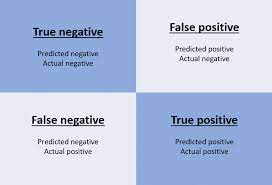
TP=ÏßÑÏßú ÏñëÏÑ±Ïùò Ïàò, TN=ÏßÑÏßú ÏùåÏÑ±Ïùò Ïàò ,FP=Í±∞Ïßì ÏñëÏÑ±Ïùò Ïàò, FN=Í±∞Ïßì ÏùåÏÑ±Ïùò Ïàò

In [22]:
y_train_perfect_predictions = y_train_5 # ÏôÑÎ≤ΩÌïú Î∂ÑÎ•òÍ∏∞Ïùº Í≤ΩÏö∞/
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]], dtype=int64)

ÎçîÏö± ÏöîÏïΩÎêú ÏßÄÌëúÎ•º ÌïÑÏöîÎ°ú Ìï† Îïå ÏÇ¥Ìé¥Î≥ºÎßåÌïú Í≤ÉÏùÄ ÏñëÏÑ± ÏòàÏ∏°Ïùò Ï†ïÌôïÎèÑÏù¥Îã§. Ïù¥Î•º Î∂ÑÎ•òÍ∏∞Ïùò **Ï†ïÎ∞ÄÎèÑ(precision)**ÎùºÍ≥† ÌïúÎã§. 

Ï†ïÎ∞ÄÎèÑ = TP / (TP + FP)

ÌôïÏã§Ìïú ÏñëÏÑ± ÏÉòÌîå ÌïòÎÇòÎßå ÏòàÏ∏°ÌïòÎ©¥ Í∞ÑÎã®Ìûà ÏôÑÎ≤ΩÌïú Ï†ïÎ∞ÄÎèÑ(=1/1+0)Î•º ÏñªÏùÑ Ïàò ÏûàÏßÄÎßå Ïù¥Îäî Î∂ÑÎ•òÍ∏∞Í∞Ä Îã§Î•∏ Î™®Îì† ÏñëÏÑ± ÏÉòÌîåÏùÑ Î¨¥ÏãúÌïòÍ∏∞ ÎñÑÎ¨∏Ïóê Í∑∏Î¶¨ Ïú†Ïö©ÌïòÏßÄ ÏïäÎã§. Ï†ïÎ∞ÄÎèÑÎäî **Ïû¨ÌòÑÏú®(recall)**Ïù¥ÎùºÎäî Îòê Îã§Î•∏ ÏßÄÌëúÏôÄ Í∞ôÏù¥ ÏÇ¨Ïö©ÌïòÎäî Í≤ÉÏù¥ ÏùºÎ∞òÏ†ÅÏù¥Îã§. \
Ïû¨ÌòÑÏú®ÏùÄ Î∂ÑÎ•òÍ∏∞Í∞Ä Ï†ïÌôïÌïòÍ≤å Í∞êÏßÄÌïú ÏñëÏÑ± ÏÉòÌîåÏùò ÎπÑÏú®Î°ú **ÎØºÍ∞êÎèÑ(sensitivity)** ÎòêÎäî **ÏßÑÏßú ÏñëÏÑ± ÎπÑÏú®(true positive rate)**Ïù¥ÎùºÍ≥†ÎèÑ ÌïúÎã§.

Ïû¨ÌòÑÏú® = TP / (TP + FN)

### 2-3.Ï†ïÎ∞ÄÎèÑÏôÄ Ïû¨ÌòÑÏú®
Ï†ïÎ∞ÄÎèÑÎäî Í≤ÄÏÉâÎêú Í≤∞Í≥ºÎì§ Ï§ë Í¥ÄÎ†® ÏûàÎäî Í≤ÉÏúºÎ°ú Î∂ÑÎ•òÎêú Í≤∞Í≥ºÎ¨ºÏùò ÎπÑÏú®Ïù¥Í≥†\
Ïû¨ÌòÑÏú®ÏùÄ Í¥ÄÎ†® ÏûàÎäî Í≤ÉÏúºÎ°ú Î∂ÑÎ•òÎêú Ìï≠Î™©Îì§ Ï§ë Ïã§Ï†ú Í≤ÄÏÉâÎêú Ìï≠Î™©Îì§Ïùò ÎπÑÏú®Ïù¥Îã§

sklearnÏùÄ Ï†ïÎ∞ÄÎèÑÏôÄ Ïû¨ÌòÑÏú®ÏùÑ Ìè¨Ìï®ÌïòÏó¨ Î∂ÑÎ•òÍ∏∞Ïùò ÏßÄÌëúÎ•º Í≥ÑÏÇ∞ÌïòÎäî Ïó¨Îü¨ Ìï®ÏàòÎ•º Ï†úÍ≥µÌïúÎã§.

In [23]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [24]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

Ïù¥Ï†ú '5-Í∞êÏßÄÍ∏∞'Í∞Ä Ï†ïÌôïÎèÑÏóêÏÑú Î¥§ÏùÑ ÎïåÎßåÌÅº Ï¢ãÏïÑÎ≥¥Ïù¥ÏßÄ ÏïäÎäîÎã§. 5Î°ú ÌåêÎ≥ÑÎêú Ïù¥ÎØ∏ÏßÄÏ§ë 72.9%Îßå Ï†ïÌôïÌïòÍ≥† Ï†ÑÏ≤¥ Ïà´Ïûê 5ÏóêÏÑú 75.6%Îßå Í∞êÏßÄÌñàÎã§.

Ï†ïÎ∞ÄÎèÑÏôÄ Ïû¨ÌòÑÏú®ÏùÑ **F1 score**ÎùºÍ≥† ÌïòÎäî ÌïòÎÇòÏùò Ïà´ÏûêÎ°ú ÎßåÎì§Î©¥ Ìé∏Î¶¨ÌïòÎã§. F1Ï†êÏàòÎäî Ï†ïÎ∞ÄÎèÑÏôÄ Ïû¨ÌòÑÏú®Ïùò **Ï°∞Ìôî ÌèâÍ∑†(harmonic mean)**Ïù¥Îã§.
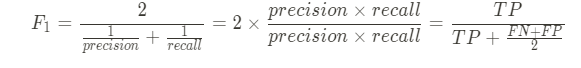

F1 Ï†êÏàòÎ•º Í≥ÑÏÇ∞ÌïòÎ†§Î©¥ f1_score() Ìï®ÏàòÎ•º Ìò∏Ï∂úÌïúÎã§.

In [25]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7325171197343846

Ï†ïÎ∞ÄÎèÑÏôÄ Ïû¨ÌòÑÏú®Ïù¥ ÎπÑÏä∑Ìïú Î∂ÑÎ•òÍ∏∞ÏóêÏÑ† F1 Ï†êÏàòÍ∞Ä ÎÜíÎã§. ÌïòÏßÄÎßå ÏÉÅÌô©Ïóê Îî∞Îùº Ï†ïÎ∞ÄÎèÑÍ∞Ä Ï§ëÏöîÌïòÍ±∞ÎÇò Ïû¨ÌòÑÏú®Ïù¥ Ï§ëÏöîÌï† ÏàòÎèÑ ÏûàÎã§. \
ÏòàÎ•º Îì§Ïñ¥ ÏïÑÏù¥Î•º ÏúÑÌï¥ ÏïàÏ†ÑÌïú ÎèôÏòÅÏÉÅÏùÑ Í±∏Îü¨ÎÇ¥Îäî Î∂ÑÎ•òÍ∏∞Î•º ÌõàÎ†®Ìï†Îïå, Ïû¨ÌòÑÏú®ÏùÄ ÎÜíÏúºÎÇò ÎÇòÏÅú ÎèôÏòÅÏÉÅÎèÑ Î™áÍ∞ú ÎÖ∏Ï∂úÎêòÎäî Í≤ÉÎ≥¥Îã®, ÎÇÆÏùÄ Ïû¨ÌòÑÏú®Î°ú Ï¢ãÏùÄ ÎèôÏòÅÏÉÅÏù¥ Î™áÍ∞ú Ï†úÏô∏ÎêòÎçîÎùºÎèÑ ÏïàÏ†ÑÌïú Í≤ÉÎì§Îßå ÎÖ∏Ï∂úÏãúÌÇ§Îäî ÎÜíÏùÄ Ï†ïÎ∞ÄÎèÑÏùò Î∂ÑÎ•òÍ∏∞Í∞Ä ÏÑ†Ìò∏ÎêúÎã§.\
Í∑∏Ïóê ÎπÑÌï¥ ÎèÑÎëëÏùÑ Ïû°ÏïÑÎÇ¥Îäî Î∂ÑÎ•òÍ∏∞Î•º ÌõàÎ†®Ìï†Îïå, Î∂ÑÎ•òÍ∏∞Ïùò Ïû¨ÌòÑÏú®Ïù¥ 99%ÎùºÎ©¥ Ï†ïÌôïÎèÑÍ∞Ä 30%Îßå ÎêòÎçîÎùºÎèÑ Í¥úÏ∞ÆÏùÑÏßÄÎèÑ Î™®Î•∏Îã§.

Ïù¥Ï≤òÎüº Ï†ïÎ∞ÄÎèÑÏôÄ Ïû¨ÌòÑÏú®Ïù¥ Î∞òÎπÑÎ°ÄÌïòÎäî Í≤ÉÏùÑ **Ï†ïÎ∞ÄÎèÑ/Ïû¨ÌòÑÏú® Ìä∏Î†àÏù¥ÎìúÏò§ÌîÑ**ÎùºÍ≥† ÌïúÎã§.

### 2-4.Ï†ïÎ∞ÄÎèÑ/Ïû¨ÌòÑÏú® Ìä∏Î†àÏù¥ÎìúÏò§ÌîÑ
SGDClassifierÎäî **Í≤∞Ï†ï Ìï®Ïàò(decision function)**ÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ Í∞Å ÏÉòÌîåÏùò Ï†êÏàòÎ•º Í≥ÑÏÇ∞ÌïúÎã§. Ïù¥ Ï†êÏàòÍ∞Ä ÏûÑÍ≥óÍ∞íÎ≥¥Îã§ ÌÅ¨Î©¥ ÏÉòÌîåÏùÑ ÏñëÏÑ± ÌÅ¥ÎûòÏä§Ïóê Ìï†ÎãπÌïòÍ≥† Î∞òÎåÄÎ°† ÏùåÏÑ± ÌÅ¥ÎûòÏä§Ïóê Ìï†ÎãπÌïúÎã§. 

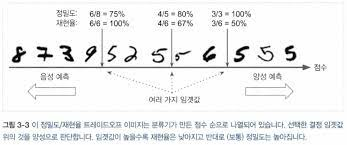

ÏúÑ ÏÇ¨ÏßÑÏóêÏÑú Í∞ÄÏö¥Îç∞ ÌôîÏÇ¥ÌëúÍ∞Ä **Í≤∞Ï†ï ÏûÑÍ≥óÍ∞í(decision threshold)**Ïùº Îïå ÏûÑÍ≥óÍ∞í Ïò§Î•∏Ï™ΩÏóê 4Í∞úÏùò TPÍ∞Ä ÏûàÍ≥† 1Í∞úÏùò FPÍ∞Ä ÏûàÍ∏∞Ïóê Ï†ïÎ∞ÄÎèÑÎäî 4/(4+1)=80%Í∞Ä ÎêúÎã§. ÌïòÏßÄÎßå TPÎäî 4Í∞úÍ≥† FPÎäî 2Í∞ú Ïù¥ÎØÄÎ°ú 4/(4+2)=67%Ïù¥Îã§. \
ÏûÑÍ≥óÍ∞íÏùÑ Ïò§Î•∏Ï™ΩÏúºÎ°ú ÏòÆÍ∏∞Î©¥ FPÏù∏ '6'Ïù¥ TNÏù¥ ÎêòÎØÄÎ°ú Ï†ïÎ∞ÄÎèÑÍ∞Ä 3/(3+0)=100%Í∞Ä ÎêúÎã§. ÌïòÏßÄÎßå TPÌïòÎÇòÍ∞Ä FNÍ∞Ä ÎêòÎ©∞ Ïû¨ÌòÑÏú®Ïù¥ 3/(3+3)=50%Î°ú Ï§ÑÏñ¥Îì†Îã§.

ÏÇ¨Ïù¥ÌÇ∑Îü∞ÏóêÏÑú ÏûÑÍ≥óÍ∞íÏùÑ ÏßÅÏ†ë ÏßÄÏ†ïÌï† Ïàú ÏóÜÏßÄÎßå ÏòàÏ∏°Ïóê ÏÇ¨Ïö©Ìïú Ï†êÏàòÎäî ÌôïÏù∏Ìï† Ïàò ÏûàÎã§. Î∂ÑÎ•òÍ∏∞Ïùò predict() Î©îÏÑúÎìú ÎåÄÏã† decision_function() Î©îÏÑúÎìúÎ•º Ìò∏Ï∂úÌïòÎ©¥ Í∞Å ÏÉòÌîåÏùò Ï†êÏàòÎ•º ÏñªÏùÑ Ïàò ÏûàÎã§. Ïù¥ Ï†êÏàòÎ•º Í∏∞Î∞òÏúºÎ°ú ÏõêÌïòÎäî ÏûÑÍ≥óÍ∞íÏùÑ Ï†ïÌï¥ ÏòàÏ∏°ÏùÑ ÎßåÎì§ Ïàò ÏûàÎã§.

In [26]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([2164.22030239])

In [27]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)

y_some_digit_pred

array([ True])

In [28]:
threshold = 8000
y_some_digit_pred = (y_scores > threshold)

y_some_digit_pred

array([False])

ÏúÑÏùò threshold(ÏûÑÍ≥óÍ∞í)ÏùÑ Î∞îÍøîÍ∞ÄÎ©∞ Í≥ÑÏÇ∞Ìïú Í≤ÉÏúºÎ°ú ÏûÑÍ≥óÍ∞íÏùÑ ÎÜíÏù¥Î©¥ Ïû¨ÌòÑÏùÑÏù¥ Ï§ÑÏñ¥Îì†Îã§Îäî Í≤ÉÏùÑ Ïïå Ïàò ÏûàÎã§. 

Ï†ÅÏ†àÌïú ÏûÑÍ≥óÍ∞íÏùÑ Ï∞æÍ∏∞ ÏúÑÌï¥ cross_val_predict()Ìï®ÏàòÎ•º ÏÇ¨Ïö©Ìï¥ ÌõàÎ†® ÏÑ∏Ìä∏Ïóê ÏûàÎäî Î™®Îì† ÏÉòÌîåÏùò Ï†ïÏàòÎ•º Íµ¨Ìï¥ÏïºÌïúÎã§. ÌïòÏßÄÎßå Ïù¥Î≤àÏóêÎäî ÏòàÏ∏° Í≤∞Í≥ºÍ∞Ä ÏïÑÎãå Í≤∞Ï†ï Ï†êÏàòÎ•º Î∞òÌôòÎ∞õÎèÑÎ°ù ÏßÄÏ†ïÌï¥ÏïºÌïúÎã§.

In [29]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, 
                             method='decision_function')

In [30]:
y_scores.shape

(60000,)

In [31]:
if y_scores.ndim == 2:
    y_scores = y_scores[:,1]

In [32]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

Saving figure precision_recall_vs_threshold_plot


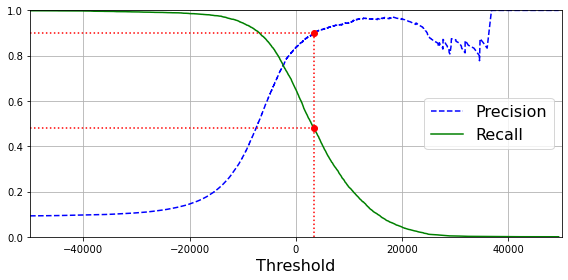

In [33]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.legend(loc='center right', fontsize=16)
    plt.xlabel("Threshold", fontsize=16)
    plt.grid(True)
    plt.axis([-50000, 50000, 0, 1])
    
recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]

plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.9], 'r:')
plt.plot([-50000, threshold_90_precision], [0.9, 0.9], 'r:')
plt.plot([-50000, threshold_90_precision], [recall_90_precision, recall_90_precision], 'r:')
plt.plot([threshold_90_precision], [0.9], "ro")     
plt.plot([threshold_90_precision], [recall_90_precision], "ro")       

save_fig("precision_recall_vs_threshold_plot")
plt.show()

Ï†ïÎ∞ÄÎèÑ ÏµúÏÜå 90% Îã¨ÏÑ±Ïù¥ Î™©ÌëúÎùºÎ©¥ Í∑∏ÎûòÌîÑÏóêÏÑú ÏïΩ 8000Ï†ïÎèÑÎùºÍ≥† Î≥º Ïàò ÏûàÍ≥† ÏïÑÎûòÏùò ÏΩîÎìúÎ°ú Ï†ïÌôïÌïú Í∞ÄÏû• ÎÇÆÏùÄ ÏûÑÍ≥óÍ∞íÏùÑ Ïïå Ïàò ÏûàÎã§. 

In [34]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]
threshold_90_precision

3370.0194991439557

ÌõàÎ†® ÏÑ∏Ìä∏Ïóê ÎåÄÌïú ÏòàÏ∏°ÏùÑ ÎßåÎì§Í∏∞ ÏúÑÌï¥ Î∂ÑÎ•òÍ∏∞Ïùò predict() Î©îÏÑúÎìú ÎåÄÏã† Îã§Ïùå ÏΩîÎìúÎ•º Ïã§ÌñâÌïúÎã§.

In [35]:
y_train_pred_90 = (y_scores >= threshold_90_precision)

Ïù¥Ï†ú ÏòàÏ∏°Ïóê ÎåÄÌïú Ï†ïÎ∞ÄÎèÑÏôÄ Ïû¨ÌòÑÏú®ÏùÑ ÌôïÏù∏Ìï¥Î≥∏Îã§

In [36]:
precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

In [37]:
recall_score(y_train_5, y_train_pred_90)

0.4799852425751706

Ï¢ãÏùÄ Ï†ïÎ∞ÄÎèÑ/Ïû¨ÌòÑÏú® Ìä∏Î†àÏù¥ÎìúÏò§ÌîÑÎ•º ÏÑ†ÌÉùÌïòÎäî Îã§Î•∏ Î∞©Î≤ïÏùÄ Ïû¨ÌòÑÏú®Ïóê ÎåÄÌïú Ï†ïÎ∞ÄÎèÑ Í≥°ÏÑ†ÏùÑ Í∑∏Î¶¨Îäî Í≤ÉÏù¥Îã§.


Saving figure precision_vs_recall_plot


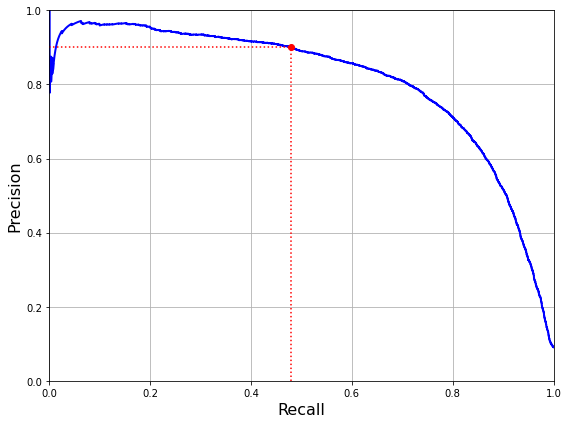

In [38]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, 'b-', linewidth=2)
    plt.xlabel('Recall', fontsize=16)
    plt.ylabel('Precision', fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)
    
plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)

plt.plot([recall_90_precision, recall_90_precision], [0., 0.9], "r:")
plt.plot([0.0, recall_90_precision], [0.9, 0.9], "r:")
plt.plot([recall_90_precision], [0.9], "ro")

save_fig('precision_vs_recall_plot')
plt.show()

 Ïû¨ÌòÑÏú® 80% Í∑ºÏ≤òÏóêÏÑú Ï†ïÎ∞ÄÎèÑÍ∞Ä Í∏âÍ≤©Ìûà Ï§ÄÎã§. Ïù¥ ÌïòÍ∞ïÏ†ê ÏßÅÏ†ÑÏùÑ Ï†ïÎ∞ÄÎèÑ/Ïû¨ÌòÑÏú® Ìä∏Î†àÏù¥ÎìúÏò§ÌîÑÎ°ú ÏÑ†ÌÉùÌïòÎäî Í≤ÉÏù¥ Ï¢ãÎã§. 

### 2-5. ROC Í≥°ÏÑ†

**ÏàòÏã†Í∏∞ Ï°∞Ïûë ÌäπÏÑ±(Receiver Operating Characteristic, ROC)**Í≥°ÏÑ†ÎèÑ Ïù¥ÏßÑ Î∂ÑÎ•òÏóêÏÑú ÎÑêÎ¶¨ ÏÇ¨Ïö©ÎêúÎã§. Ïù¥Îäî **Í±∞Ïßì ÏñëÏÑ± ÎπÑÏú®(FP Rate)**Ïóê ÎåÄÌïú **ÏßÑÏßú ÏñëÏÑ± ÎπÑÏú®(TPR)**Ïùò Í≥°ÏÑ†Ïù¥Îã§. FPRÏùÄ 1ÏóêÏÑú **ÏßÑÏßú ÏùåÏÑ± ÎπÑÏú®(TNR)**ÏùÑ Î∫Ä Í∞íÏù¥Îã§. TNRÏùÄ **ÌäπÏù¥ÎèÑ(specificity)**ÎùºÍ≥†ÎèÑ ÌïúÎã§. Îî∞ÎùºÏÑú ROC Í≥°ÏÑ†ÏùÄ **ÎØºÍ∞êÎèÑ**(Ïû¨ÌòÑÏú®)Ïóê ÎåÄÌïú **1-ÌäπÏù¥ÎèÑ** Í∑∏ÎûòÌîÑÏù¥Îã§.

ROC Í≥°ÏÑ†ÏùÑ Í∑∏Î¶¨Í∏∞ ÏúÑÌï¥ roc_curve() Ìï®ÏàòÎ•º Ïù¥Ïö©Ìï¥ Ïó¨Îü¨ ÏûÑÍ≥óÍ∞íÏóêÏÑú TPRÍ≥º FPRÏùÑ Í≥ÑÏÇ∞Ìï¥Ïïº ÌïúÎã§.

In [39]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

Saving figure roc_curve_plot


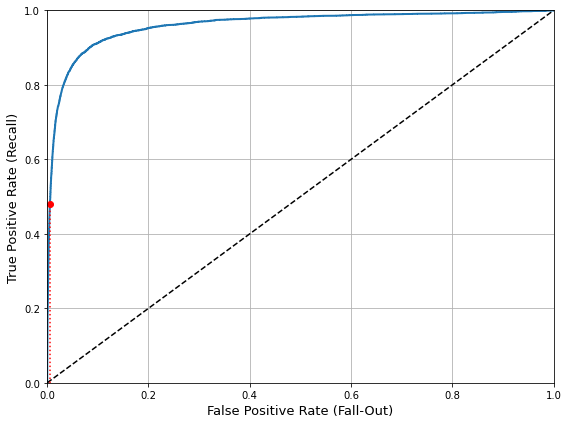

In [40]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1], [0,1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=13)
    plt.ylabel('True Positive Rate (Recall)', fontsize=13)
    plt.grid(True)
    
plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
fpr_90 = fpr[np.argmax(tpr >= recall_90_precision)]           
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")   
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")  
plt.plot([fpr_90], [recall_90_precision], "ro")               
save_fig("roc_curve_plot")                                    
plt.show()

(Î∂âÏùÄ Ï†êÏù¥ ÏÑ†ÌÉùÌïú ÎπÑÏú®Ïùò ÏßÄÏ†êÏù¥Îã§. 43.68%Ïùò Ïû¨ÌòÑÏú®)\
Ïù¥Í≥≥ÏóêÏÑúÎèÑ Ìä∏Î†àÏù¥ÎìúÏò§ÌîÑÍ∞Ä ÏûàÎã§. Ïû¨ÌòÑÏú®(TPR)Ïù¥ ÎÜíÏùÑÏàòÎ°ù Î∂ÑÎ•òÍ∏∞Í∞Ä ÎßåÎìúÎäî Í±∞Ïßì ÏñëÏÑ±(FPR)Ïù¥ ÎäòÏñ¥ÎÇúÎã§. Ï†êÏÑ†ÏùÄ ÏôÑÏ†ÑÌïú *ÎûúÎç§ Î∂ÑÎ•òÍ∏∞Ïùò ROCÍ≥°ÏÑ†ÏùÑ ÎúªÌïúÎã§. Ïù¥ Ï†êÏÑ†ÏóêÏÑú Í∞ÄÏû• Î©ÄÎ¶¨ Îñ®Ïñ¥Ï†∏ ÏûàÎäî Í≤ÉÏù¥ Ï¢ãÏùÄ Î∂ÑÎ•òÍ∏∞Ïù¥Îã§.

`*ÎûúÎç§ Î∂ÑÎ•òÍ∏∞Îäî ÌõàÎ†® Îç∞Ïù¥ÌÑ∞Ïùò ÌÅ¥ÎûòÏä§ ÎπÑÏú®ÏùÑ Îî∞Îùº Î¨¥ÏûëÏúÑÎ°ú ÏòàÏ∏°ÌïòÎäî Í≤ÉÏùÑ ÎßêÌïúÎã§. Ïù¥Î†áÍ≤å ÎêòÎ©¥ Ïò§Ï∞® ÌñâÎ†¨Ïùò Ïã§Ï†ú ÌÅ¥ÎûòÏä§Í∞Ä ÎπÑÏä∑Ìïú ÎπÑÏú®Ïùò ÏòàÏ∏° ÌÅ¥ÎûòÏä§Î°ú ÎÇòÎâòÏñ¥ FPRÍ≥º TPR Í∞íÏù¥ ÎπÑÏä∑Ìï¥ÏßÑÎã§.` 

Í≥°ÏÑ† ÏïÑÎûòÏùò Î©¥Ï†Å(AUC)ÏùÑ Ï∏°Ï†ïÌïòÎ©¥ Î∂ÑÎ•òÍ∏∞Îì§ÏùÑ ÎπÑÍµêÌï† Ïàò ÏûàÎã§. ROCÏùò AUCÍ∞Ä 1Ïù¥Î©¥ ÏôÑÎ≤ΩÌïú Î∂ÑÎ•òÍ∏∞, 0.5Î©¥ ÏôÑÏ†ÑÌïú ÎûúÎç§ Î∂ÑÎ•òÍ∏∞Ïù¥Îã§. roc_auc_scoreÎ•º Ïù¥Ïö©Ìï¥ ROCÏùò AUCÎ•º Í≥ÑÏÇ∞ÌïúÎã§.

In [41]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9604938554008616

RandomForestClassifierÎ•º ÌõàÎ†®ÏãúÏºú SGDClassifierÏùò ROCÍ≥°ÏÑ†Í≥º ROC AUC Ï†êÏàòÎ•º ÎπÑÍµêÌïúÎã§. Î®ºÏ†Ä ÌõàÎ†® ÏÑ∏Ìä∏Ïùò ÏÉòÌîåÏóê ÎåÄÌïú Ï†êÏàòÎ•º ÏñªÏñ¥ÏïºÌïúÎã§, \
RandomForestClassifierÎäî decision_function() Î©îÏÑúÎìú ÎåÄÏã† predict_proba() Î©îÏÑúÎìúÍ∞Ä ÏûàÎã§. Ïù¥Îäî Ìñâ, ÌÅ¥ÎûòÏä§Í∞Ä Ïó¥Ïù¥Í≥† ÏÉòÌîåÏù¥ Ï£ºÏñ¥ÏßÑ ÌÅ¥ÎûòÏä§Ïóê ÏÜçÌï† ÌôïÎ•†ÏùÑ Îã¥ÏùÄ Î∞∞Ïó¥ÏùÑ Î∞òÌôòÌïúÎã§. 

In [42]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, 
                                   method='predict_proba')

roc_curve() Ìï®ÏàòÏóê Ï†êÏàò ÎåÄÏã† ÌÅ¥ÎûòÏä§ ÌôïÎ•†ÏùÑ Ï†ÑÎã¨Ìï† Ïàò ÏûàÎã§. ÏñëÏÑ± ÌÅ¥ÎûòÏä§ ÌôïÎ•†ÏùÑ Ï†êÏàòÎ°ú ÏÇ¨Ïö©Ìï¥Î≥∏Îã§.

In [43]:
y_scores_forest = y_probas_forest[:, 1]
fpr_forest, tpr_forest, threshold_forest = roc_curve(y_train_5, y_scores_forest)

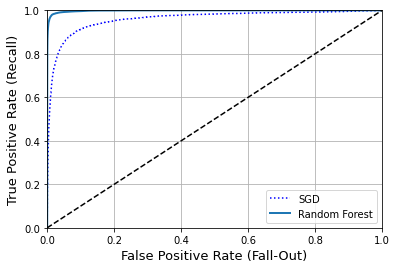

In [44]:
plt.plot(fpr, tpr, 'b:', label='SGD')
plot_roc_curve(fpr_forest, tpr_forest, 'Random Forest')
plt.legend(loc='lower right')
plt.show()

RandomForestClassifierÏùò ROCÍ≥°ÏÑ†Ïù¥ ÏôºÏ™Ω ÏúÑ Î™®ÏÑúÎ¶¨Ïóê ÎçîÏö± Í∞ÄÍπùÍ∏∞Ïóê SGDClassifierÎ≥¥Îã§ Ï¢ãÎã§Í≥† ÌåêÎã®Ìï† Ïàò ÏûàÎã§.

In [45]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

ÎãπÏó∞Ìûà ROCÏùò AUCÎèÑ ÎÜíÎã§. 

## 3. Îã§Ï§ë Î∂ÑÎ•ò

Îã§Ï§ë Î∂ÑÎ•òÍ∏∞(multiclass classifier)ÎòêÎäî Îã§Ìï≠ Î∂ÑÎ•òÍ∏∞(multinormial classfier)Îäî Îëò Ïù¥ÏÉÅÏùò ÌÅ¥ÎûòÏä§Î•º Íµ¨Î≥ÑÌï† Ïàò ÏûàÎã§.

SGD, Random Forest, Naive Bayes Îì± ÏùÄ Ïó¨Îü¨Í∞úÏùò ÌÅ¥ÎûòÏä§Î•º ÏßÅÏ†ë Ï≤òÎ¶¨Ìï† Ïàò ÏûàÎäî Î∞òÎ©¥ Logistic Regression, SVM Îì±ÏùÄ Ïù¥ÏßÑ Î∂ÑÎ•òÎßå Í∞ÄÎä•ÌïòÎã§. ÌïòÏßÄÎßå Ïó¨Îü¨Í∞ú ÏÇ¨Ïö©Ìï¥ Îã§Ï§ë ÌÅ¥ÎûòÏä§Î•º Î∂ÑÎ•òÌïòÎäî Í∏∞Î≤ïÎèÑ ÏûàÎã§. \
ÏòàÎ•º Îì§Ïñ¥ Ïù¥ÏßÑ Î∂ÑÎ•òÍ∏∞ 10Í∞úÎ•º ÏÇ¨Ïö©Ìï¥ 0~9ÍπåÏßÄÎ•º ÌõàÎ†®ÏãúÏºú ÌÅ¥ÎûòÏä§Í∞Ä 10Í∞úÏù∏ Ïà´Ïûê Ïù¥ÎØ∏ÏßÄ Î∂ÑÎ•òÍ∞Ä Í∞ÄÎä•ÌïòÎ©∞, Î∂ÑÎ•òÍ∏∞Ïùò Í≤∞Ï†ï Ï†êÏàò Ï§ë Í∞ÄÏû• ÎÜíÏùÄ Í≤ÉÏùÑ ÌÅ¥ÎûòÏä§Î°ú ÏÑ†ÌÉùÌïòÎ©¥ ÎêúÎã§.(Ïù¥Î•º OvRÏù¥ÎùºÍ≥† ÌïúÎã§) \
ÎòêÌïú 0Í≥º 1 Íµ¨Î≥Ñ, 1Í≥º 2 Íµ¨Î≥Ñ Îì± Í∞Å Ïà´ÏûêÏùò Ï°∞Ìï©ÎßàÎã§ Ïù¥ÏßÑ Î∂ÑÎ•òÍ∏∞Î•º ÌõàÎ†®ÏãúÌÇ§Îäî Î∞©ÏãùÎèÑ ÏûàÎã§.(Ïù¥Î•º OvOÎùºÍ≥† ÌïúÎã§, NÍ∞úÏùò ÌÅ¥ÎûòÏä§ÎùºÎ©¥ Nx(N-1)/2Í∞úÏùò Î∂ÑÎ•òÍ∏∞Í∞Ä ÌïÑÏöîÌïòÎã§.)

SVMÏùÄ ÌõàÎ†® ÏÑ∏Ìä∏Ïùò ÌÅ¨Í∏∞Ïóê ÎØºÍ∞êÌï¥ÏÑú ÏûëÏùÄ ÌõàÎ†® ÏÑ∏Ìä∏ÏóêÏÑú ÎßéÏùÄ Î∂ÑÎ•òÍ∏∞Î•º ÌõàÎ†®ÏãúÌÇ§Îäî Í≤ÉÏù¥ Îπ†Î•¥ÎØÄÎ°ú OvOÍ∞Ä Ïú†Î¶¨ÌïòÎã§. (ÌïòÏßÄÎßå ÎåÄÎ∂ÄÎ∂ÑÏùò Ïù¥ÏßÑ Î∂ÑÎ•òÍ∏∞Îäî OvRÏù¥ Ïú†Î¶¨ÌïòÎã§)

Îã§Ï§ë ÌÅ¥ÎûòÏä§ Î∂ÑÎ•ò ÏûëÏóÖÏóê Ïù¥ÏßÑ Î∂ÑÎ•ò ÏïåÍ≥†Î¶¨Ï¶òÏùÑ ÏÑ†ÌÉùÌïòÎ©¥ ÏÇ¨Ïù¥ÌÇ∑Îü∞Ïù¥ ÏïåÍ≥†Î¶¨Ï¶òÏóê Îî∞Îùº ÏûêÎèôÏúºÎ°ú OvRÎòêÎäî OvOÎ•º Ïã§ÌñâÌïúÎã§. 

svmÏùÑ ÌÖåÏä§Ìä∏Ìï¥Î≥∏Îã§.

In [46]:
from sklearn.svm import SVC
svm_clf = SVC(gamma='auto', random_state=42)
svm_clf.fit(X_train[:1000], y_train[:1000])

svm_clf.predict([some_digit])

array([5], dtype=uint8)

Ïù¥ ÏΩîÎìúÎäî 0~9ÍπåÏßÄÏùò ÌÉÄÍπÉ ÌÅ¥ÎûòÏä§Î•º ÏÇ¨Ïö©Ìï¥ SVDÎ•º ÌõàÎ†®ÏãúÌÇ® Îí§ ÏòàÏ∏°ÏùÑ ÎßåÎì†Îã§.(Î™®Îç∏Ïù¥ 5ÎùºÍ≥† Ï†ïÌôïÌûà ÎßûÏ∂îÏóàÎã§.) Ïù¥Îäî ÎÇ¥Î∂ÄÏ†ÅÏúºÎ°ú OvOÏ†ÑÎûµÏùÑ ÏÇ¨Ïö©Ìï¥ 45Í∞úÏùò Ïù¥ÏßÑ Î∂ÑÎ•òÍ∏∞Î•º ÌõàÎ†®ÏãúÏºú Í∞ÅÍ∞ÅÏùò Í≤∞Ï†ï Ï†êÏàòÎ•º ÏñªÏñ¥ Ï†êÏàòÍ∞Ä Í∞ÄÏû• ÎÜíÏùÄ ÌÅ¥ÎûòÏä§Î•º ÏÑ†ÌÉùÌïúÎã§.  

decision_function()ÏùÑ Ìò∏Ï∂úÌûàÎ©¥ ÌÅ¥ÎûòÏä§ÎßàÎã§ ÌïúÍ∞úÏî© 10Í∞úÏùò Ï†êÏàòÎ•º Î∞òÌôòÌïúÎã§. 

In [47]:
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores

array([[ 2.81585438,  7.09167958,  3.82972099,  0.79365551,  5.8885703 ,
         9.29718395,  1.79862509,  8.10392157, -0.228207  ,  4.83753243]])

In [48]:
np.argmax(some_digit_scores)

5

In [49]:
svm_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [50]:
svm_clf.classes_[5]

5

ÏÇ¨Ïù¥ÌÇ∑Îü∞ÏóêÏÑú OvO, OvRÏùÑ Í∞ïÏ†úÎ°ú ÏÇ¨Ïö©ÌïòÎèÑÎ°ù ÌïòÎ†§Î©¥ OneVsOneClassifier ÌòπÏùÄ OneVsRestClassifierÎ•º ÏÇ¨Ïö©ÌïúÎã§. 

ÏúÑ ÏΩîÎìúÎäî SVCÍ∏∞Î∞òÏúºÎ°ú OvRÏ†ÑÎûµÏùÑ ÏÇ¨Ïö©ÌïúÎã§.

In [51]:
from sklearn.multiclass import OneVsRestClassifier
ovr_clf = OneVsRestClassifier(SVC(gamma="auto", random_state=42))
ovr_clf.fit(X_train[:1000], y_train[:1000])

ovr_clf.predict([some_digit])

array([5], dtype=uint8)

In [52]:
len(ovr_clf.estimators_)

10

SGDClassifierÎ•º ÌõàÎ†®ÏãúÌÇ®Îã§.

In [53]:
sgd_clf.fit(X_train[:1000], y_train[:1000])
sgd_clf.predict([some_digit])

array([5], dtype=uint8)

Ïù¥ Í≤ΩÏö∞ SGDÎ∂ÑÎ•òÍ∏∞Îäî ÏßÅÏ†ë ÏÉòÌîåÏùÑ Îã§Ï§ë ÌÅ¥ÎûòÏä§Î°ú Î∂ÑÎ•òÌï† Ïàò ÏûàÍ∏∞Ïóê Î≥ÑÎèÑÎ°ú OvR, OvOÎ•º Ï†ÅÏö©Ìï† ÌïÑÏöîÍ∞Ä ÏóÜÎã§.

In [54]:
sgd_clf.decision_function([some_digit])

array([[-6049581.97985829, -6138036.45541781, -3886281.38604605,
         -604692.42366776, -6948311.32017537,   914498.2913215 ,
        -6855666.78647961, -3866146.33271573, -4016434.08430155,
        -3209136.89074954]])

ÏúÑ Í≤∞Í≥ºÏóêÏÑú ÎåÄÎ∂ÄÎ∂ÑÏùò Ï†êÏàòÍ∞Ä ÌÅ∞ ÏùåÏàòÏù∏ Î∞òÎ©¥ ÌÅ¥ÎûòÏä§ 5Ïùò Ï†êÏàòÎäî 914498Ï†êÏù¥Îã§. 

Ïù¥Ï†ú Î∂ÑÎ•òÍ∏∞Î•º ÌèâÍ∞ÄÌï¥Ïïº ÌïòÎäîÎç∞ Ï£ºÎ°ú ÍµêÏ∞® Í≤ÄÏ¶ùÏù¥ ÏÇ¨Ïö©ÎêúÎã§.

In [55]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring='accuracy')

array([0.87365, 0.85835, 0.8689 ])

Î™®Îì† ÌÖåÏä§Ìä∏ Ìè¥ÎìúÏóêÏÑú 84%Ïù¥ÏÉÅÏù¥Îã§. ÏûÖÎ†•Ïùò Ïä§ÏºÄÏùºÏùÑ Ï°∞Ï†ïÌïòÎ©¥ Ï†ïÌôïÎèÑÎ•º 89%Ïù¥ÏÉÅÏúºÎ°ú ÎÜíÏùº Ïàò ÏûàÎã§. 

In [56]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring='accuracy')

array([0.8983, 0.891 , 0.9018])

## 4. ÏóêÎü¨ Î∂ÑÏÑù

Í∞ÄÎä•ÏÑ±Ïù¥ ÎÜíÏùÄ Î™®Îç∏ÏùÑ ÌïòÎÇò Ï∞æÏïòÎã§Í≥† Í∞ÄÏ†ïÌïúÎã§. Ïù¥ Î™®Îç∏Ïùò ÏÑ±Îä•ÏùÑ Ìñ•ÏÉÅÏãúÌÇ¨ Î∞©Î≤ïÏùÑ Ï∞æÏùÑ Îïå ÎßåÎì§Ïñ¥ÏßÑ ÏóêÎü¨Ïùò Ï¢ÖÎ•òÎ•º Î∂ÑÏÑùÌïòÎäî Î∞©Î≤ïÏù¥ ÏûàÎã§.

Î®ºÏ†Ä Ïò§Ï∞® ÌñâÎ†¨ÏùÑ ÏÇ¥Ìé¥Î≥º Ïàò ÏûàÎã§.

In [57]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5577,    0,   22,    5,    8,   43,   36,    6,  225,    1],
       [   0, 6400,   37,   24,    4,   44,    4,    7,  212,   10],
       [  27,   27, 5220,   92,   73,   27,   67,   36,  378,   11],
       [  22,   17,  117, 5227,    2,  203,   27,   40,  403,   73],
       [  12,   14,   41,    9, 5182,   12,   34,   27,  347,  164],
       [  27,   15,   30,  168,   53, 4444,   75,   14,  535,   60],
       [  30,   15,   42,    3,   44,   97, 5552,    3,  131,    1],
       [  21,   10,   51,   30,   49,   12,    3, 5684,  195,  210],
       [  17,   63,   48,   86,    3,  126,   25,   10, 5429,   44],
       [  25,   18,   30,   64,  118,   36,    1,  179,  371, 5107]],
      dtype=int64)

5Ïù∏ Í≤ÉÏùÑ 5Î°ú Î∂ÑÎ•òÌïú Í≤ÉÏù¥ 4484Í∞úÎ°ú, ÏïåÎßûÍ≤å Î∂ÑÎ•òÌïú Í≤É Ï§ë Í∞ÄÏû• ÏûëÎã§.

Ïò§Ï∞® ÌñâÎ†¨ÏùÄ matshow()Î°ú Ïù¥ÎØ∏ÏßÄÎ°ú ÌëúÌòÑÌïòÎ©¥ Î≥¥Í∏∞ Ìé∏ÌïòÎã§. (Î∞∞Ïó¥ÏóêÏÑú ÌÅ∞ Í∞íÏùÄ Ìù∞ÏÉâ, ÏûëÏùÄ Í∞íÏùÄ Í≤ÄÏùÄÏÉâÏúºÎ°ú Ï†ïÍ∑úÌôîÎêòÏñ¥ Í∑∏Î†§ÏßÑÎã§.)

Saving figure confusion_matrix_plot


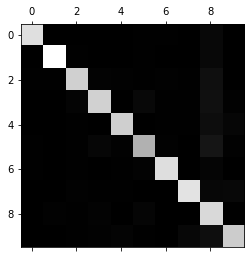

In [58]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
save_fig("confusion_matrix_plot", tight_layout=False)
plt.show()

Ïù¥ Ïò§Ï∞® ÌñâÎ†¨ÏùÄ ÎåÄÎ∂ÄÎ∂ÑÏùò Ïù¥ÎØ∏ÏßÄÍ∞Ä Ïò¨Î∞îÎ•¥Í≤å Î∂ÑÎ•òÎêòÏóàÏùåÏùÑ ÎÇòÌÉÄÎÇ¥Îäî Ï£º ÎåÄÍ∞ÅÏÑ†Ïóê ÏûàÎã§. Ïà´Ïûê 5Îäî ÏÉÅÎåÄÏ†ÅÏúºÎ°ú Ïñ¥ÎëêÏõå Î≥¥Ïù∏Îã§. Ïù¥Îäî Îç∞Ïù¥ÌÑ∞ÏÖãÏóê Ïà´Ïûê 5Ïùò Ïù¥ÎØ∏ÏßÄÍ∞Ä Ï†ÅÍ±∞ÎÇò Î∂ÑÎ•òÍ∏∞Í∞Ä 5Î•º Ïûò Î∂ÑÎ•òÌïòÏßÄ Î™ªÌïúÎã§Îäî ÎúªÏù¥Îã§. 

Ïù¥Ï†ú Í∑∏ÎûòÌîÑÏùò ÏóêÎü¨ Î∂ÄÎ∂ÑÏóê Ï¥àÏ†êÏùÑ ÎßûÏ∂∞ÏÑú, Ïò§Ï∞® ÌñâÎ†¨Ïùò Í∞Å Í∞íÏùÑ ÎåÄÏùëÎêòÎäî ÌÅ¥ÎûòÏä§Ïùò Ïù¥ÎØ∏ÏßÄ Í∞úÏàòÎ°ú ÎÇòÎà† ÏóêÎü¨ ÎπÑÏú®ÏùÑ ÎπÑÍµêÌïúÎã§. 

In [67]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

Ï£ºÎåÄÍ∞ÅÏÑ†Îßå 0ÏúºÎ°ú Ï±ÑÏõå Í∑∏ÎûòÌîÑÎ•º Í∑∏Î¶∞Îã§. 

Saving figure confusion_matrix_errors_plot


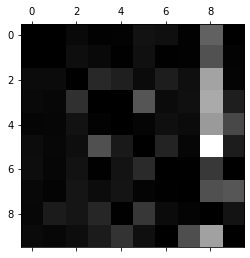

In [68]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
save_fig("confusion_matrix_errors_plot", tight_layout=False)
plt.show()

Ïù¥ Ïò§Ï∞® ÌñâÎ†¨ÏóêÏÑú Î∂ÑÎ•òÍ∏∞Í∞Ä ÎßåÎì† ÏóêÎü¨Î•º ÌôïÏã§Ìûà Î≥º Ïàò ÏûàÎã§. rowÎäî Ïã§Ï†ú ÌÅ¥ÎûòÏä§Î•º ÎÇòÌÉÄÎÇ¥Í≥† columnÏùÄ ÏòàÏ∏°Ìïú ÌÅ¥ÎûòÏä§Î•º ÎÇòÌÉÄÎÇ∏Îã§. 8Ïùò columnÏù¥ Î∞ùÏúºÎØÄÎ°ú ÎßéÏùÄ Ïù¥ÎØ∏ÏßÄÍ∞Ä 8Î°ú ÏûòÎ™ª Î∂ÑÎ•òÎêòÏóàÏùåÏùÑ Ïïå Ïàò ÏûàÎã§. ÌïòÏßÄÎßå 8Ïùò rowÎäî Î∞ùÏßÄ ÏïäÏúºÎØÄÎ°ú 8Ïù¥ Ï†ÅÏ†àÌûà 8Î°ú Î∂ÑÎ•òÎêòÏóàÏùåÏùÑ Ïïå Ïàò ÏûàÎã§. \
ÎòêÌïú 3Í≥º 5Í∞Ä ÏÑúÎ°ú ÌòºÎèôÎêòÍ≥† ÏûàÎäî Í≤ÉÎèÑ Î≥º Ïàò ÏûàÎã§.

Ïò§Ï∞® ÌñâÎ†¨ÏùÑ Î∂ÑÏÑùÌïòÎØÄÎ°ú Î∂ÑÎ•òÍ∏∞Ïùò ÏÑ±Îä• Ìñ•ÏÉÅ Î∞©ÏïàÏóê ÎåÄÌïú ÌÜµÏ∞∞ÏùÑ ÏñªÏùÑ Ïàò ÏûàÎã§. ÏòàÎ•º Îì§Ïñ¥ ÏúÑ Í∑∏ÎûòÌîÑÏóêÏÑ† 8Î°ú ÏûòÎ™ª Î∂ÑÎ•òÎêòÎäî Í≤ÉÏùÑ Ï§ÑÏù¥ÎèÑÎ°ù Í∞úÏÑ†Ìï† ÌïÑÏöîÍ∞Ä ÏûàÎã§. 8Ï≤òÎüº Î≥¥Ïù¥Îäî Ïà´ÏûêÏùò ÌõàÎ†® Îç∞Ïù¥ÌÑ∞Î•º Îçî ÎßéÏù¥ Î™®ÏïÑÏÑú Ïã§Ï†ú 8Í≥º Íµ¨Î∂ÑÌïòÎèÑÎ°ù Î∂ÑÎ•òÍ∏∞Î•º ÌïôÏäµÌï† Ïàò ÏûàÎã§. \
ÎòêÎäî Î∂ÑÎ•òÍ∏∞Ïóê ÎèÑÏõÄ Îê†ÎßåÌïú ÌäπÏÑ±(ÎèôÏã¨Ïõê, Ïù¥ÎØ∏ÏßÄ Ï†ÑÏ≤òÎ¶¨)ÏùÑ Îçî Ï∞æÏïÑÎ≥º ÏàòÎèÑ ÏûàÎã§.

Í∞úÍ∞úÏùò ÏóêÎü¨Î•º Î∂ÑÏÑùÌï¥Î≥¥Î©¥ Î∂ÑÎ•òÍ∏∞Í∞Ä Î¨¥Ïä® ÏùºÏùÑ ÌïòÍ≥†, Ïôú ÏûòÎ™ªÎêòÏóàÎäîÏßÄÏóê ÎåÄÌïú ÌÜµÏ∞∞ÏùÑ ÏñªÏùÑ Ïàò ÏûàÏßÄÎßå, ÏãúÍ∞ÑÏù¥ Ïò§ÎûòÍ±∏Î¶∞Îã§. 3Í≥º 5Ïùò ÏÉòÌîåÏùÑ Í∑∏Î†§Î≥∏Îã§.

Saving figure error_analysis_digits_plot


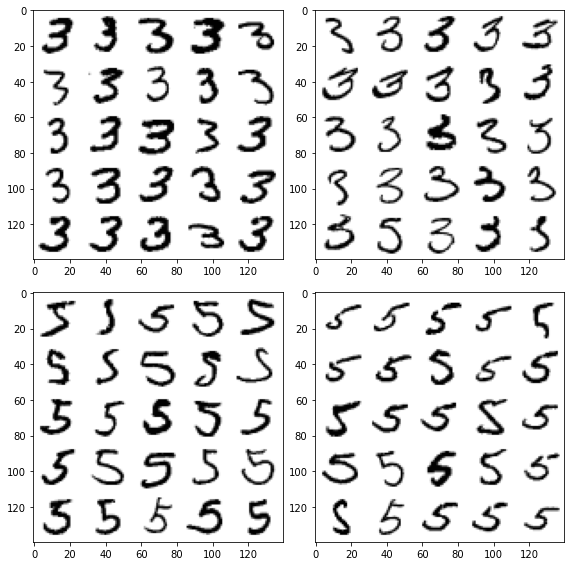

In [69]:
cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)] # 3ÏùÑ 3ÏúºÎ°ú Î∂ÑÎ•ò
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)] # 3ÏùÑ 5Î°ú Î∂ÑÎ•ò
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)] # 5Î•º 3ÏúºÎ°ú Î∂ÑÎ•ò
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)] # 5Î•º 5Î°ú Î∂ÑÎ•ò

plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
save_fig("error_analysis_digits_plot")
plt.show()

ÏôºÏ™ΩÏùò 5x5Î∏îÎ°ù Îëê Í∞úÎäî 3ÏúºÎ°ú Î∂ÑÎ•òÎêú Ïù¥ÎØ∏ÏßÄ, Ïò§Î•∏Ï™ΩÏùÄ 5Î°ú Î∂ÑÎ•òÎêú Ïù¥ÎØ∏ÏßÄÏù¥Îã§.

ÏôºÏ™Ω ÏïÑÎûò, Ïò§Î•∏Ï™Ω ÏúÑÏùò ÎåÄÎ∂ÄÎ∂ÑÏùò Ïù¥ÎØ∏ÏßÄÎì§ÏùÄ Î∂ÑÎ•òÍ∏∞Í∞Ä ÏûòÎ™ª Î∂ÑÎ•òÌïú Í≤ÉÏù¥ Ïù¥Ìï¥Í∞Ä ÎêòÏßÄ ÏïäÎäîÎã§. \
Ïù¥Îäî SGDClassifierÎ•º ÏÇ¨Ïö©ÌñàÍ∏∞ ÎïåÎ¨∏Ïù∏Îã§. ÏÑ†Ìòï Î∂ÑÎ•òÍ∏∞Îäî ÌÅ¥ÎûòÏä§ÎßàÎã§ ÌîΩÏÖÄÏóê Í∞ÄÏ§ëÏπòÎ•º Ìï†ÎãπÌïòÍ≥† ÏÉàÎ°úÏö¥ Ïù¥ÎØ∏ÏßÄÏóê ÎåÄÌï¥ Îã®ÏàúÌûà ÌîΩÏÖÄ Í∞ïÎèÑÏùò Í∞ÄÏ§ëÏπò Ìï©ÏùÑ ÌÅ¥ÎûòÏä§Ïùò Ï†êÏàòÎ°ú Í≥ÑÏÇ∞ÌïúÎã§. Îî∞ÎùºÏÑú 3Í≥º 5Îäî Î™áÍ∞úÏùò ÌîΩÏÖÄÎßå Îã§Î•¥Í∏∞Ïóê Î™®Îç∏Ïù¥ ÌòºÎèôÌï† Ïàò Î∞ñÏóê ÏóÜÎã§.


## 5. Îã§Ï§ë Î†àÏù¥Î∏î Î∂ÑÎ•ò

Î∂ÑÎ•òÍ∏∞Í∞Ä ÏÉòÌîåÎßàÎã§ Ïó¨Îü¨Í∞úÏùò ÌÅ¥ÎûòÏä§Î•º Ï∂úÎ†•Ìï¥ÏïºÌï† Îïå **Îã§Ï§ë Î†àÏù¥Î∏î Î∂ÑÎ•ò(multilabel classification)**ÏãúÏä§ÌÖúÏùÑ ÏÇ¨Ïö©ÌïúÎã§.

In [63]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

ÏúÑ ÏΩîÎìúÎäî Í∞Å Ïà´Ïûê Ïù¥ÎØ∏ÏßÄÏóê Îëê Í∞úÏùò ÌÉÄÍπÉ Î†àÏù¥Î∏îÏù¥ Îã¥Í∏¥ y_multilabel Î∞∞Ïó¥ÏùÑ ÎßåÎì†Îã§. Ï≤´ Î≤àÏß∏Îäî Ïà´ÏûêÍ∞Ä ÌÅ∞ Í∞í(7,8,9)Ïù∏ÏßÄ ÎÇòÌÉÄÎÇ¥Í≥† Îëê Î≤àÏß∏Îäî ÌôÄÏàòÏù∏ÏßÄ ÎÇòÌÉÄÎÇ∏Îã§. 

Ïù¥Ï†ú ÏòàÏ∏°ÏùÑ ÎßåÎì§Î©¥ Î†àÏù¥Î∏îÏù¥ Îëê Í∞ú Ï∂úÎ†•ÎêúÎã§.

In [64]:
knn_clf.predict([some_digit])

array([[False,  True]])

5Îäî ÌÅ¨ÏßÄ ÏïäÍ≥† ÌôÄÏàòÏù¥ÎØÄÎ°ú Ïò¨Î∞îÎ•∏ Î∂ÑÎ•òÏù¥Îã§. 

Îã§Ï§ë Î†àÏù¥Î∏î Î∂ÑÎ•òÍ∏∞Ïùò ÌèâÍ∞ÄÎ•º ÏúÑÌï¥ Í∞Å Î†àÏù¥Î∏îÏùò F1Ï†êÏàòÎ•º Íµ¨ÌïòÍ≥† ÌèâÍ∑†Ï†êÏàòÎ•º Í≥ÑÏÇ∞Ìï† Ïàò ÏûàÎã§. 

In [66]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
f1_score(y_multilabel, y_train_knn_pred, average='macro')

0.976410265560605

ÏúÑ ÏΩîÎìúÎäî Î™®Îì† Î†àÏù¥Î∏îÏùò Í∞ÄÏ§ëÏπòÍ∞Ä Í∞ôÎã§Í≥† Í∞ÄÏ†ïÌñàÎã§. \
average='weighted'Î°ú ÏÑ§Ï†ïÌïòÎ©¥ Î†àÏù¥Î∏îÏóê ÌÅ¥ÎûòÏä§Ïùò ÌÉÄÍπÉ Î†àÏù¥Î∏îÏóê ÏÜçÌïú ÏÉòÌîå Ïàò(support)Î•º Í∞ÄÏ§ëÏπòÎ°ú Ï§ÄÎã§.

## 6. Îã§Ï§ë Ï∂úÎ†• Î∂ÑÎ•ò

**Îã§Ï§ë Ï∂úÎ†• Î∂ÑÎ•ò(multioutput classification)**ÏûëÏóÖÏùÄ Îã§Ï§ë Î†àÏù¥Î∏î Î∂ÑÎ•òÏóêÏÑú Ìïú Î†àÏù¥Î∏îÏù¥ Îã§Ï§ë ÌÅ¥ÎûòÏä§Í∞Ä Îê† Ïàò ÏûàÎèÑÎ°ù ÏùºÎ∞òÌôîÌïú Í≤ÉÏù¥Îã§.

Ïù¥Î•º ÏúÑÌï¥ Ïù¥ÎØ∏ÏßÄÏóêÏÑú Ïû°ÏùåÏùÑ Ï†úÍ±∞ÌïòÎäî Í≤ÉÏù¥ ÌïÑÏöîÌïòÎã§. Ïû°ÏùåÏù¥ ÎßéÏùÄ Ïà´Ïûê Ïù¥ÎØ∏ÏßÄÎ•º ÏûÖÎ†•ÏúºÎ°ú Î∞õÍ≥† Íπ®ÎÅóÌïú Ïà´Ïûê Ïù¥ÎØ∏ÏßÄÎ•º MNIST Ïù¥ÎØ∏ÏßÄÏ≤òÎüº ÌîΩÏÖÄÏùò Í∞ïÎèÑÎ•º Îã¥ÏùÄ Î∞∞Ïó¥Î°ú Ï∂úÎ†•ÌïúÎã§. Î∂ÑÎ•òÍ∏∞Ïùò Ï∂úÎ†•Ïù¥ Îã§Ï§ë Î†àÏù¥Î∏îÏù¥Í≥† Í∞Å Î†àÏù¥Î∏îÏùÄ Í∞íÏùÑ Ïó¨Îü¨Í∞ú Í∞ñÎäîÎã§. Í∑∏Îü¨ÎØÄÎ°ú Îã§Ï§ë Ï∂úÎ†• Î∂ÑÎ•ò ÏãúÏä§ÌÖúÏù¥ ÎêúÎã§.

Î®ºÏ†Ä MNIST Ïù¥ÎØ∏ÏßÄÏóêÏÑú Ï∂îÏ∂úÌïú ÌõàÎ†® ÏÑ∏Ìä∏ÏôÄ ÌÖåÏä§Ìä∏ ÏÑ∏Ìä∏Ïóê ÎÑòÌååÏù¥Ïùò randint()Î•º ÏÇ¨Ïö©Ìï¥ ÌîΩÏÖÄ Í∞ïÎèÑÏóê Ïû°ÏùåÏùÑ Ï∂îÍ∞ÄÌïúÎã§. 

In [73]:
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

Saving figure noisy_digit_example_plot


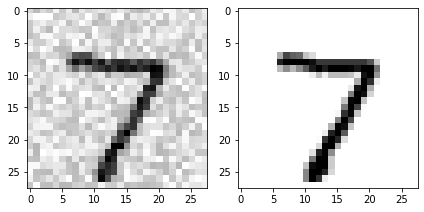

In [75]:
some_index = 0
plt.subplot(121); plot_digit(X_test_mod[some_index])
plt.subplot(122); plot_digit(y_test_mod[some_index])
save_fig('noisy_digit_example_plot')
plt.show()

Î∂ÑÎ•òÍ∏∞Î•º ÌõàÎ†®ÏãúÏºú ÍªòÎÅóÌïòÍ≤å ÎßåÎì†Îã§.

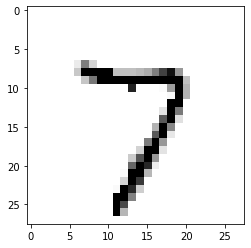

In [76]:
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[some_index]])
plot_digit(clean_digit)

ÌÉÄÍπÉ Ï¶â, ÍªòÎÅóÌïú Ïù¥ÎØ∏ÏßÄÏôÄ ÎπÑÏä∑ÌïòÎã§. 

# Ï∂îÍ∞Ä ÎÇ¥Ïö©

### Dummy(ie, random) classifier

In [77]:
from sklearn.dummy import DummyClassifier
dmy_clf = DummyClassifier(strategy='prior')
y_probas_dmy = cross_val_predict(dmy_clf, X_train, y_train_5, cv=3, method='predict_proba')
y_scores_dmy = y_probas_dmy[:, 1]

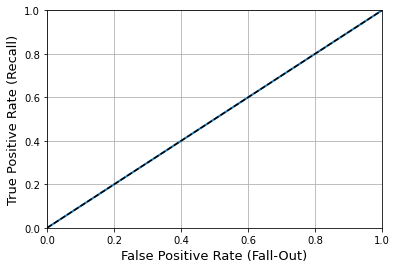

In [78]:
fprr, tprr, thresholdsr = roc_curve(y_train_5, y_scores_dmy)
plot_roc_curve(fprr, tprr)

### KNN Classifier

In [79]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(weights='distance', n_neighbors=4)
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [80]:
y_knn_pred = knn_clf.predict(X_test)

In [81]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_knn_pred)

0.9714

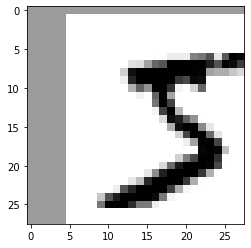

In [82]:
from scipy.ndimage.interpolation import shift
def shift_digit(digit_array, dx, dy, new=0):
    return shift(digit_array.reshape(28, 28), [dy, dx], cval=new).reshape(784)

plot_digit(shift_digit(some_digit, 5, 1, new=100))

In [83]:
X_train_expanded = [X_train]
y_train_expanded = [y_train]
for dx, dy in ((1, 0), (-1, 0), (0, 1), (0, -1)):
    shifted_images = np.apply_along_axis(shift_digit, axis=1, arr=X_train, dx=dx, dy=dy)
    X_train_expanded.append(shifted_images)
    y_train_expanded.append(y_train)

X_train_expanded = np.concatenate(X_train_expanded)
y_train_expanded = np.concatenate(y_train_expanded)
X_train_expanded.shape, y_train_expanded.shape

((300000, 784), (300000,))

In [84]:
knn_clf.fit(X_train_expanded, y_train_expanded)

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [85]:
y_knn_expanded_pred = knn_clf.predict(X_test)

In [86]:
accuracy_score(y_test, y_knn_expanded_pred)

0.9763

In [88]:
ambiguous_digit = X_test[2589]
knn_clf.predict_proba([ambiguous_digit])

array([[0.24579675, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.75420325]])

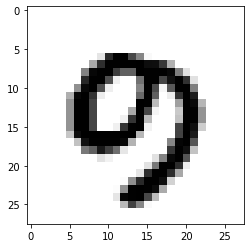

In [89]:
plot_digit(ambiguous_digit)

# üìèÏó∞Ïäµ Î¨∏Ï†ú ÌíÄÏñ¥Î≥¥Í∏∞

#### Ï†ïÌôïÎèÑ 97%Ïù¥ÏÉÅ Îã¨ÏÑ±

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

param_grid = [{'weights': ['uniform', 'distance'], 'n_neighbors':[3,4,5]}]

knn_clf = KNeighborsClassifier()
grid_search = GridSearchCV(knn_clf, param_grid, cv=5, verbose=3)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END .................n_neighbors=3, weights=uniform; total time=  39.3s
[CV 2/5] END .................n_neighbors=3, weights=uniform; total time=  43.9s
[CV 3/5] END .................n_neighbors=3, weights=uniform; total time=  43.5s
[CV 4/5] END .................n_neighbors=3, weights=uniform; total time=  43.5s
[CV 5/5] END .................n_neighbors=3, weights=uniform; total time=  36.1s
[CV 1/5] END ................n_neighbors=3, weights=distance; total time=  33.4s
[CV 2/5] END ................n_neighbors=3, weights=distance; total time=  32.6s
[CV 3/5] END ................n_neighbors=3, weights=distance; total time=  32.3s
[CV 4/5] END ................n_neighbors=3, weights=distance; total time=  32.0s
[CV 5/5] END ................n_neighbors=3, weights=distance; total time=  31.8s
[CV 1/5] END .................n_neighbors=4, weights=uniform; total time=  38.3s
[CV 2/5] END .................n_neighbors=4, weig

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [3, 4, 5],
                          'weights': ['uniform', 'distance']}],
             verbose=3)

In [28]:
grid_search.best_params_

{'n_neighbors': 4, 'weights': 'distance'}

In [29]:
grid_search.best_score_

0.9716166666666666

In [30]:
from sklearn.metrics import accuracy_score

y_pred = grid_search.predict(X_test)
accuracy_score(y_test, y_pred)

0.9714

#### Îç∞Ïù¥ÌÑ∞ Ï¶ùÏãù, ÌõàÎ†® ÏÑ∏Ìä∏ ÌôïÏû•
MNISTÏù¥ÎØ∏ÏßÄÎ•º Ïñ¥Îäê Î∞©Ìñ•ÏúºÎ°úÎì† Ìïú ÌîΩÏÖÄ Ïù¥ÎèôÏãúÌÇ§Îäî Ìï®ÏàòÎ•º ÎßåÎì§Í≥†, ÌõàÎ†® ÏÑ∏Ìä∏Ïóê ÏûàÎäî Í∞Å Ïù¥ÎØ∏ÏßÄÏóê ÎÑ§ Í∞úÏùò Ïù¥ÎèôÎêú Î≥µÏÇ¨Î≥∏ÏùÑ ÎßåÎì§Ïñ¥ ÌõàÎ†®ÏÑ∏Ìä∏Ïóê Ï∂îÍ∞ÄÌïúÎã§. Ïù¥Î•º ÏúÑÏùò ÏµúÏÑ†Ïùò Î™®Îç∏Ïóê ÌõàÎ†®ÏãúÏºú Ï†ïÌôïÎèÑÎ•º Ï∏°Ï†ïÌï¥Î≥¥Îùº

In [31]:
from scipy.ndimage.interpolation import shift

In [50]:
def shift_image(image, dx, dy):
    image = image.reshape((28,28))
    shifted_image = shift(image, [dy, dx], cval=0, mode='constant')
    return shifted_image.reshape([-1])

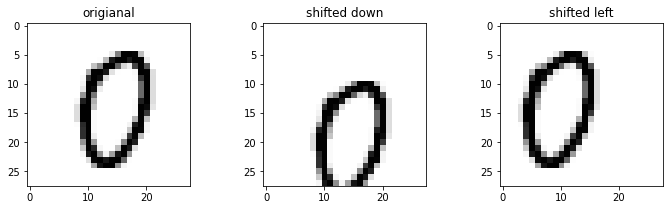

In [51]:
image = X_train[1000]
shifted_image_down = shift_image(image, 0, 5)
shifted_image_left = shift_image(image, -5, 0)

plt.figure(figsize=(12, 3))

plt.subplot(131)
plt.title('origianal')
plt.imshow(image.reshape(28,28), interpolation='nearest', cmap='Greys')

plt.subplot(132)
plt.title('shifted down')
plt.imshow(shifted_image_down.reshape(28,28), interpolation='nearest', cmap='Greys')

plt.subplot(133)
plt.title('shifted left')
plt.imshow(shifted_image_left.reshape(28, 28), interpolation='nearest', cmap='Greys')
plt.show()

In [52]:
X_train_augmented = [image for image in X_train]
y_train_augmented = [label for label in y_train]

for dx, dy in ((1, 0), (-1, 0), (0, 1), (0, -1)):
    for image, label in zip(X_train, y_train):
        X_train_augmented.append(shift_image(image, dx, dy))
        y_train_augmented.append(label)

X_train_augmented = np.array(X_train_augmented)
y_train_augmented = np.array(y_train_augmented)

In [53]:
shuffle_idx = np.random.permutation(len(X_train_augmented))
X_train_augmented = X_train_augmented[shuffle_idx]
y_train_augmented = y_train_augmented[shuffle_idx]

In [55]:
knn_clf = KNeighborsClassifier(**grid_search.best_params_)

In [56]:
knn_clf.fit(X_train_augmented, y_train_augmented)

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [57]:
y_pred = knn_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9763

### ÌÉÄÏù¥ÌÉÄÎãâ Îç∞Ïù¥ÌÑ∞ÏÖã

In [2]:
import os

TITANIC_PATH = os.path.join('datasets','titanic')

In [3]:
import pandas as pd

def load_titanic_data(filename, titanic_path=TITANIC_PATH):
    csv_path = os.path.join(titanic_path, filename)
    return pd.read_csv(csv_path)

In [4]:
train_data =load_titanic_data('train.csv')
test_data =load_titanic_data('test.csv')

In [5]:
train_data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

- Survied: targetÏù¥Îã§. 
- Pclass: ÏäπÍ∞ù ÌÅ¥ÎûòÏä§
- SibSp: Ìï®Íªò ÌÉëÏäπÌïú ÌòïÏ†úÏûêÎß§ÏôÄ Î∞∞Ïö∞Ïûê Ïàò
- Parch: Ìï®Íªò ÌÉëÏäπÌïú ÏûêÎÖÄÏôÄ Î∂ÄÎ™®
- Ticket: Ìã∞Ïºì ÏïÑÏù¥Îîî
- Fare: ÏßÄÎ∂àÌïú Í∏àÏï°
- Cabin: Í∞ùÏã§ Î≤àÌò∏
- Embarked: ÌÉëÏäπÌïú Í≥≥

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


NameÍ≥º TiketÏùÄ Î™®Îç∏Ïù¥ ÏÇ¨Ïö©ÌïòÍ∏∞Ïóê Ïú†Ïö©Ìïú Ïà´ÏûêÎ°ú Î≥ÄÌôòÌïòÎäîÎç∞ ÍπåÎã§Î°≠Í∏∞ ÎïåÎ¨∏Ïóê Î¨¥ÏãúÌïúÎã§.

In [7]:
train_data.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

- 38%Ï†ïÎèÑ Î∞ñÏóê ÏÉùÏ°¥ÌïòÏßÄ Î™ªÌñàÎã§.
- Í∏àÏï°Ïùò ÌèâÍ∑†ÏùÄ 32.20ÌååÏö¥ÎìúÏù¥Îã§. 
- ÎÇòÏù¥ ÌèâÍ∑†ÏùÄ 30Î≥¥Îã§ ÏïÑÎûòÎã§.

In [9]:
train_data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [10]:
train_data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [11]:
train_data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [12]:
train_data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

EmbarkedÏùò SCQÎäî Í∞ÅÍ∞Å Southampton, Cherbourg, QueenstownÏù¥Îã§.

### preprocessing pipeline building

In [14]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names]

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([
    ('select_numeric', DataFrameSelector(['Age', 'SibSp', 'Parch','Fare'])),
    ('Imputer', SimpleImputer(strategy='median')),
])

In [18]:
num_pipeline.fit_transform(train_data)

array([[22.    ,  1.    ,  0.    ,  7.25  ],
       [38.    ,  1.    ,  0.    , 71.2833],
       [26.    ,  0.    ,  0.    ,  7.925 ],
       ...,
       [28.    ,  1.    ,  2.    , 23.45  ],
       [26.    ,  0.    ,  0.    , 30.    ],
       [32.    ,  0.    ,  0.    ,  7.75  ]])

In [21]:
class MostFrequentImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.most_frequent_ = pd.Series([X[c].value_counts().index[0] for c in X],
                                       index=X.columns)
        return self
    def transform(self, X, y=None):
        return X.fillna(self.most_frequent_)

In [22]:
from sklearn.preprocessing import OneHotEncoder

In [23]:
cat_pipeline = Pipeline([
    ('select_cat', DataFrameSelector(['Pclass', 'Sex', 'Embarked'])),
    ('imputer', MostFrequentImputer()),
    ('cat_encoder', OneHotEncoder(sparse=False)),
])

In [24]:
cat_pipeline.fit_transform(train_data)

array([[0., 0., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 1.],
       ...,
       [0., 0., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 1., 0.]])

In [25]:
from sklearn.pipeline import FeatureUnion

preprocess_pipeline = FeatureUnion(transformer_list=[
    ('num_pipeline', num_pipeline),
    ('cat_pipeline', cat_pipeline),
])

In [26]:
X_train = preprocess_pipeline.fit_transform(train_data)
X_train

array([[22.,  1.,  0., ...,  0.,  0.,  1.],
       [38.,  1.,  0., ...,  1.,  0.,  0.],
       [26.,  0.,  0., ...,  0.,  0.,  1.],
       ...,
       [28.,  1.,  2., ...,  0.,  0.,  1.],
       [26.,  0.,  0., ...,  1.,  0.,  0.],
       [32.,  0.,  0., ...,  0.,  1.,  0.]])

In [27]:
y_train = train_data['Survived']

ready to classifier. Let's start SVC

In [28]:
from sklearn.svm import SVC

svm_clf = SVC(gamma='auto')
svm_clf.fit(X_train, y_train)

SVC(gamma='auto')

In [31]:
X_test = preprocess_pipeline.transform(test_data)
y_pred = svm_clf.predict(X_test)

cross val ÏàòÌñâ

In [32]:
from sklearn.model_selection import cross_val_score

svm_scores = cross_val_score(svm_clf, X_train, y_train, cv=10)
svm_scores.mean()

0.7329588014981274

80%Ï†ïÎèÑÎäî ÎÑòÍ≤®Ïïº ÎêòÏßÄ ÏïäÎÉê?„Öã

In [34]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
forest_scores = cross_val_score(forest_clf, X_train, y_train, cv=10)
forest_scores.mean()

0.8126466916354558

10Í∞úÏùò foldÎì§ Ï†ïÌôïÎèÑÏùò ÌèâÍ∑†ÏùÑ Î≥¥Îäî Í≤ÉÎ≥¥Îã§. Î™®Îç∏Ïùò 10Í∞úÏùò Ï†êÏàòÏóê ÎåÄÌï¥ plotÏùÑ Í∑∏Î¶∞Îã§.

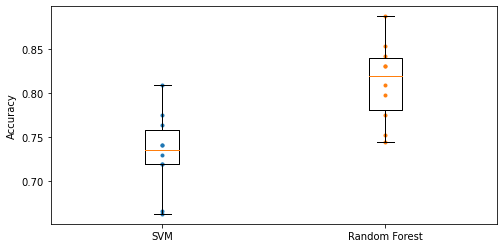

In [38]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
plt.plot([1]*10, svm_scores, '.')
plt.plot([2]*10, forest_scores, '.')
plt.boxplot([svm_scores, forest_scores], labels=('SVM', 'Random Forest'))
plt.ylabel('Accuracy')
plt.show()

In [39]:
train_data['AgeBucket'] = train_data['Age'] // 15 * 15
train_data[['AgeBucket', 'Survived']].groupby(['AgeBucket']).mean()

Survived
AgeBucket          
0.0        0.576923
15.0       0.362745
30.0       0.423256
45.0       0.404494
60.0       0.240000
75.0       1.000000

In [41]:
train_data['RelativesOnboard'] = train_data['SibSp'] + train_data['Parch']
train_data[['RelativesOnboard', 'Survived']].groupby(['RelativesOnboard']).mean()

Survived
RelativesOnboard          
0                 0.303538
1                 0.552795
2                 0.578431
3                 0.724138
4                 0.200000
5                 0.136364
6                 0.333333
7                 0.000000
10                0.000000

### Spam classifier

In [1]:
import os
import tarfile
import urllib.request

DOWNLOAD_ROOT = "http://spamassassin.apache.org/old/publiccorpus/"
HAM_URL = DOWNLOAD_ROOT + "20030228_easy_ham.tar.bz2"
SPAM_URL = DOWNLOAD_ROOT + "20030228_spam.tar.bz2"
SPAM_PATH = os.path.join("datasets", "spam")

def fetch_spam_data(ham_url=HAM_URL, spam_url=SPAM_URL, spam_path=SPAM_PATH):
    if not os.path.isdir(spam_path):
        os.makedirs(spam_path)
    for filename, url in (('ham.tar.bz2', ham_url), ('spam.tar.bz2', spam_url)):
        path = os.path.join(spam_path, filename)
        if not os.path.isfile(path):
            urllib.request.urlretrieve(url, path)
        tar_bz2_file = tarfile.open(path)
        tar_bz2_file.extractall(path=spam_path)
        tar_bz2_file.close()
        
        
fetch_spam_data()

In [2]:
HAM_DIR = os.path.join(SPAM_PATH, 'easy_ham')
SPAM_DIR = os.path.join(SPAM_PATH, 'spam')
ham_filenames = [name for name in sorted(os.listdir(HAM_DIR)) if len(name) > 20]
spam_filenames = [name for name in sorted(os.listdir(SPAM_DIR)) if len(name) > 20]

In [3]:
len(ham_filenames)

2500

In [4]:
len(spam_filenames)

500

In [5]:
import email
import email.policy

def load_email(is_spam, filename, spam_path=SPAM_PATH):
    directory = 'spam' if is_spam else 'easy_ham'
    with open(os.path.join(spam_path, directory, filename), 'rb') as f:
        return email.parser.BytesParser(policy=email.policy.default).parse(f)

In [8]:
ham_emails = [load_email(is_spam=False, filename=name) for name in ham_filenames]
spam_emails = [load_email(is_spam=True, filename=name) for name in spam_filenames]

Îç∞Ïù¥ÌÑ∞Ïùò ÏÉùÍπÄÏÉàÎ•º Î≥¥Í∏∞ ÏúÑÌï¥ Ïä§Ìå∏Í≥º ÌñÑÏùò ÌïúÍ∞ÄÏßÄ ÏòàÏãúÎì§ÏùÑ Î≥∏Îã§

In [9]:
print(ham_emails[1].get_content().strip())

Martin A posted:
Tassos Papadopoulos, the Greek sculptor behind the plan, judged that the
 limestone of Mount Kerdylio, 70 miles east of Salonika and not far from the
 Mount Athos monastic community, was ideal for the patriotic sculpture. 
 
 As well as Alexander's granite features, 240 ft high and 170 ft wide, a
 museum, a restored amphitheatre and car park for admiring crowds are
planned
---------------------
So is this mountain limestone or granite?
If it's limestone, it'll weather pretty fast.

------------------------ Yahoo! Groups Sponsor ---------------------~-->
4 DVDs Free +s&p Join Now
http://us.click.yahoo.com/pt6YBB/NXiEAA/mG3HAA/7gSolB/TM
---------------------------------------------------------------------~->

To unsubscribe from this group, send an email to:
forteana-unsubscribe@egroups.com

 

Your use of Yahoo! Groups is subject to http://docs.yahoo.com/info/terms/


In [10]:
print(spam_emails[6].get_content().strip())

Help wanted.  We are a 14 year old fortune 500 company, that is
growing at a tremendous rate.  We are looking for individuals who
want to work from home.

This is an opportunity to make an excellent income.  No experience
is required.  We will train you.

So if you are looking to be employed from home with a career that has
vast opportunities, then go:

http://www.basetel.com/wealthnow

We are looking for energetic and self motivated people.  If that is you
than click on the link and fill out the form, and one of our
employement specialist will contact you.

To be removed from our link simple go to:

http://www.basetel.com/remove.html


4139vOLW7-758DoDY1425FRhM1-764SMFc8513fCsLl40


Ïù¥Î©îÏùºÏùÄ Ïù¥ÎØ∏ÏßÄ Ï≤®Î∂ÄÌååÏùºÏù¥ ÏûàÎäî Ïù¥Î©îÏùºÎèÑ ÏûàÎã§. Ïù¥Ï†ú Îã§ÏñëÌïú Î©îÏùºÏùò Íµ¨Ï°∞Îì§ÏùÑ ÏÇ¥Ìé¥Î≥∏Îã§.

In [11]:
def get_email_structure(email):
    if isinstance(email, str):
        return email
    payload = email.get_payload()
    if isinstance(payload, list):
        return "multipart({})".format(', '.join([
            get_email_structure(sub_email)
            for sub_email in payload
        ]))
    else:
        return email.get_content_type()

In [12]:
from collections import Counter

def structures_counter(emails):
    structures = Counter()
    for email in emails:
        structure = get_email_structure(email)
        structures[structure] += 1 
    return structures

In [13]:
structures_counter(han_emails).most_common()

[('text/plain', 2408),
 ('multipart(text/plain, application/pgp-signature)', 66),
 ('multipart(text/plain, text/html)', 8),
 ('multipart(text/plain, text/plain)', 4),
 ('multipart(text/plain)', 3),
 ('multipart(text/plain, application/octet-stream)', 2),
 ('multipart(text/plain, text/enriched)', 1),
 ('multipart(text/plain, application/ms-tnef, text/plain)', 1),
 ('multipart(multipart(text/plain, text/plain, text/plain), application/pgp-signature)',
  1),
 ('multipart(text/plain, video/mng)', 1),
 ('multipart(text/plain, multipart(text/plain))', 1),
 ('multipart(text/plain, application/x-pkcs7-signature)', 1),
 ('multipart(text/plain, multipart(text/plain, text/plain), text/rfc822-headers)',
  1),
 ('multipart(text/plain, multipart(text/plain, text/plain), multipart(multipart(text/plain, application/x-pkcs7-signature)))',
  1),
 ('multipart(text/plain, application/x-java-applet)', 1)]

In [22]:
structures_counter(spam_emails).most_common()

[('text/plain', 218),
 ('text/html', 183),
 ('multipart(text/plain, text/html)', 45),
 ('multipart(text/html)', 20),
 ('multipart(text/plain)', 19),
 ('multipart(multipart(text/html))', 5),
 ('multipart(text/plain, image/jpeg)', 3),
 ('multipart(text/html, application/octet-stream)', 2),
 ('multipart(text/plain, application/octet-stream)', 1),
 ('multipart(text/html, text/plain)', 1),
 ('multipart(multipart(text/html), application/octet-stream, image/jpeg)', 1),
 ('multipart(multipart(text/plain, text/html), image/gif)', 1),
 ('multipart/alternative', 1)]

spamÏùÄ HTMLÎ°ú Ïù¥ ÎßéÏùÄ Î∞òÎ©¥ hamÏù¥Î©îÏùºÏùÄ plain textÎ°ú Î≥¥Ïù∏Îã§. \
Í≤åÎã§Í∞Ä ÍΩ§ ÎßéÏùÄ  ham Ïù¥Î©îÏùºÎì§ÏùÄ PGPÎ•º Ïù¥Ïö©Ìï¥ÏÑú ÏÑúÎ™ÖÌïúÎã§. ÌïòÏßÄÎßå Ïä§Ìå∏ÏùÄÏïÑÎãàÎã§. 

In [24]:
for header, value in spam_emails[0].items():
    print(header, ':', value)

Return-Path : <12a1mailbot1@web.de>
Delivered-To : zzzz@localhost.spamassassin.taint.org
Received : from localhost (localhost [127.0.0.1])	by phobos.labs.spamassassin.taint.org (Postfix) with ESMTP id 136B943C32	for <zzzz@localhost>; Thu, 22 Aug 2002 08:17:21 -0400 (EDT)
Received : from mail.webnote.net [193.120.211.219]	by localhost with POP3 (fetchmail-5.9.0)	for zzzz@localhost (single-drop); Thu, 22 Aug 2002 13:17:21 +0100 (IST)
Received : from dd_it7 ([210.97.77.167])	by webnote.net (8.9.3/8.9.3) with ESMTP id NAA04623	for <zzzz@spamassassin.taint.org>; Thu, 22 Aug 2002 13:09:41 +0100
From : 12a1mailbot1@web.de
Received : from r-smtp.korea.com - 203.122.2.197 by dd_it7  with Microsoft SMTPSVC(5.5.1775.675.6);	 Sat, 24 Aug 2002 09:42:10 +0900
To : dcek1a1@netsgo.com
Subject : Life Insurance - Why Pay More?
Date : Wed, 21 Aug 2002 20:31:57 -1600
MIME-Version : 1.0
Message-ID : <0103c1042001882DD_IT7@dd_it7>
Content-Type : text/html; charset="iso-8859-1"
Content-Transfer-Encoding : qu

focus on the Subject header

In [25]:
spam_emails[0]['Subject']

'Life Insurance - Why Pay More?'

In [26]:
import numpy as np
from sklearn.model_selection import train_test_split

X = np.array(ham_emails + spam_emails, dtype=object)
y = np.array([0] * len(ham_emails) + [1] * len(spam_emails))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Ïù¥Ï†ú Ï†ÑÏ≤òÎ¶¨ Ìï®ÏàòÎ•º ÎßåÎì§ Ï∞®Î°ÄÎã§. Ï≤òÏùåÏúºÎ°ú beatifulSoup libÏùÑ Ïù¥Ïö©Ìï¥ HTMLÏùÑ plain textÎ°ú Î≥ÄÌôòÌïú Ìï®ÏàòÎ•º ÎßåÎì†Îã§. ÌïòÏßÄÎßå ÏùòÏ°¥ÏÑ±ÏùÑ Ï∂îÍ∞ÄÌïòÍ≥† Ïã∂ÏßÄ ÏïäÍ≥† Ïã∂ÏúºÎØÄÎ°ú Ï†ïÍ∑ú ÌëúÌòÑÏãùÏùÑ ÏÇ¨Ïö©ÌïúÎã§. 

Îã§Ïùå Ìï®ÏàòÎäî \<head> ÏÑπÏÖòÏùÑ ÏÇ≠Ï†úÌïú Îã§Ïùå Î™®Îì† \<a>ÌÉúÍ∑∏Î•º ÌïòÏù¥ÌçºÎßÅÌÅ¨Î°ú Î≥ÄÌôòÌïú Îí§ Î™®Îì† HTML ÌÉúÍ∑∏Î•º Ï†úÍ±∞ÌïòÍ≥† plain ÌÖçÏä§Ìä∏Îßå ÎÇ®Í∏¥Îã§. ÎòêÌïú Ïó¨Îü¨Ï§ÑÏùÄ Ìïú Ï§ÑÎ°ú ÎåÄÏ≤¥ÌïòÍ≥† HTML entitiesÎ•º Ï†úÍ±∞ÌïúÎã§.

In [34]:
import re
from html import unescape

def html_to_plain_text(html):
    text = re.sub('<head.*?>.*?</head>', '', html, flags=re.M | re.S | re.I)
    text = re.sub('<a\s.*?>', ' HYPERLINK ', text, flags=re.M | re.S | re.I)
    text = re.sub('<.*?>', '', text, flags=re.M | re.S)
    text = re.sub(r'(\s*\n)+', '\n', text, flags=re.M | re.S)
    return unescape(text)

In [35]:
# html sapm

html_spam_emails = [email for email in X_train[y_train==1]
                   if get_email_structure(email) == 'text/html']
sample_html_spam = html_spam_emails[7]
print(sample_html_spam.get_content().strip()[:1000], "...")

<HTML><HEAD><TITLE></TITLE><META http-equiv="Content-Type" content="text/html; charset=windows-1252"><STYLE>A:link {TEX-DECORATION: none}A:active {TEXT-DECORATION: none}A:visited {TEXT-DECORATION: none}A:hover {COLOR: #0033ff; TEXT-DECORATION: underline}</STYLE><META content="MSHTML 6.00.2713.1100" name="GENERATOR"></HEAD>
<BODY text="#000000" vLink="#0033ff" link="#0033ff" bgColor="#CCCC99"><TABLE borderColor="#660000" cellSpacing="0" cellPadding="0" border="0" width="100%"><TR><TD bgColor="#CCCC99" valign="top" colspan="2" height="27">
<font size="6" face="Arial, Helvetica, sans-serif" color="#660000">
<b>OTC</b></font></TD></TR><TR><TD height="2" bgcolor="#6a694f">
<font size="5" face="Times New Roman, Times, serif" color="#FFFFFF">
<b>&nbsp;Newsletter</b></font></TD><TD height="2" bgcolor="#6a694f"><div align="right"><font color="#FFFFFF">
<b>Discover Tomorrow's Winners&nbsp;</b></font></div></TD></TR><TR><TD height="25" colspan="2" bgcolor="#CCCC99"><table width="100%" border="0" 

In [36]:
# resulting plain text

print(html_to_plain_text(sample_html_spam.get_content())[:1000], '...')


OTC
¬†Newsletter
Discover Tomorrow's Winners¬†
For Immediate Release
Cal-Bay (Stock Symbol: CBYI)
Watch for analyst "Strong Buy Recommendations" and several advisory newsletters picking CBYI.  CBYI has filed to be traded on the OTCBB, share prices historically INCREASE when companies get listed on this larger trading exchange. CBYI is trading around 25 cents and should skyrocket to $2.66 - $3.25 a share in the near future.
Put CBYI on your watch list, acquire a position TODAY.
REASONS TO INVEST IN CBYI
A profitable company and is on track to beat ALL earnings estimates!
One of the FASTEST growing distributors in environmental & safety equipment instruments.
Excellent management team, several EXCLUSIVE contracts.  IMPRESSIVE client list including the U.S. Air Force, Anheuser-Busch, Chevron Refining and Mitsubishi Heavy Industries, GE-Energy & Environmental Research.
RAPIDLY GROWING INDUSTRY
Industry revenues exceed $900 million, estimates indicate that there could be as much as $25 bil

Ïù¥Ï†ú emailÏùÑ inputÏúºÎ°ú Î∞õÍ≥† plain textÎ°ú returnÌï¥Ï£ºÎäî Ìï®ÏàòÎ•º Ï†ïÏùòÌï¥Î≥¥Ïûê, 

In [37]:
def email_to_text(email):
    html = None
    for part in email.walk():
        ctype = part.get_content_type()
        if not ctype in ('text/plain', 'text/html'):
            continue
        try:
            content = part.get_content()
        except:
            content = str(part.get_payload())
        if ctype == 'text/plain':
            return content
        else:
            html = content
    if html:
        return html_to_plain_text(html)

In [38]:
print(email_to_text(sample_html_spam)[:100], '...')


OTC
¬†Newsletter
Discover Tomorrow's Winners¬†
For Immediate Release
Cal-Bay (Stock Symbol: CBYI)
Wat ...
